In [1]:
#Libraries Imported
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [2]:
ad_data = pd.read_csv('advertising.csv')

In [3]:
AdX = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male','Clicked on Ad']]

In [4]:
AdX

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0
...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,1
996,51.30,45,67782.17,134.42,1,1
997,51.63,51,42415.72,120.37,1,1
998,55.55,19,41920.79,187.95,0,0


**Check the head of ad_data**

In [5]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


** Use info and describe() on ad_data**

In [6]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [7]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

** Create a histogram of the Age**

Text(0.5, 0, 'Age')

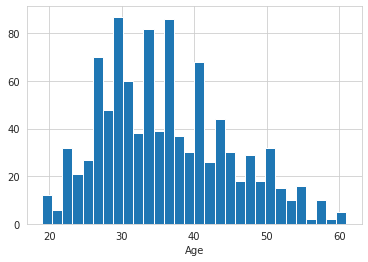

In [8]:
sns.set_style('whitegrid')
ad_data['Age'].hist(bins=30)
plt.xlabel('Age')

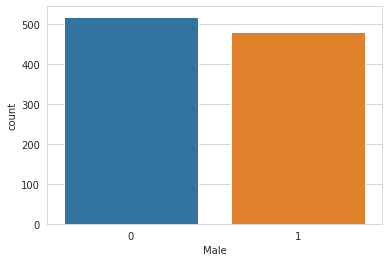

In [10]:
sns.countplot(x='Male',data=ad_data)

**Create a jointplot showing Area Income versus Age.**

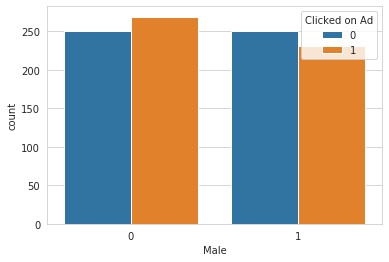

In [24]:
sns.countplot(x='Male',data=ad_data,hue='Clicked on Ad')

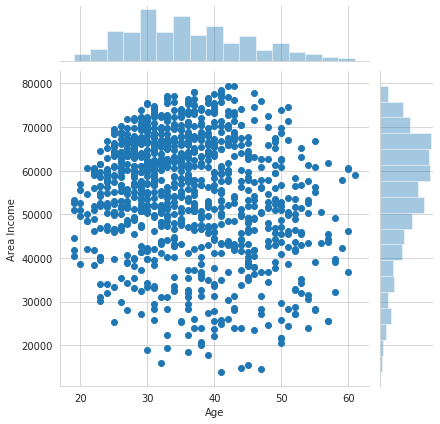

In [9]:
sns.jointplot(x='Age',y='Area Income',data=ad_data)

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

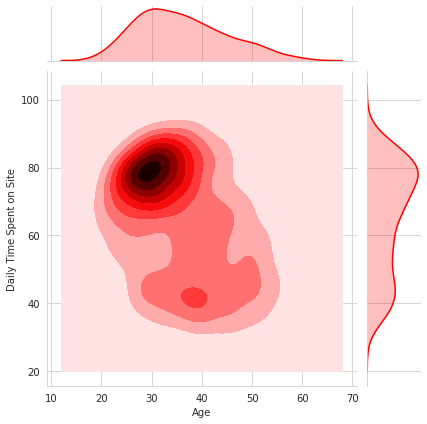

In [10]:
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=ad_data,color='red',kind='kde');

** Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

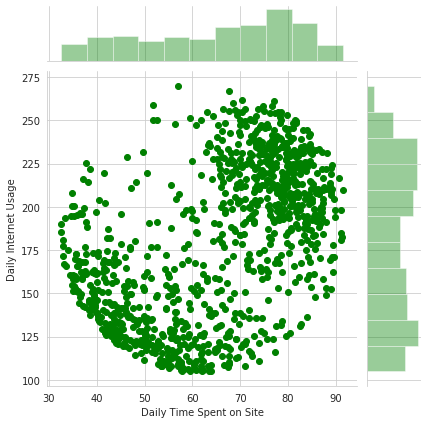

In [11]:
sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=ad_data,color='green')

** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

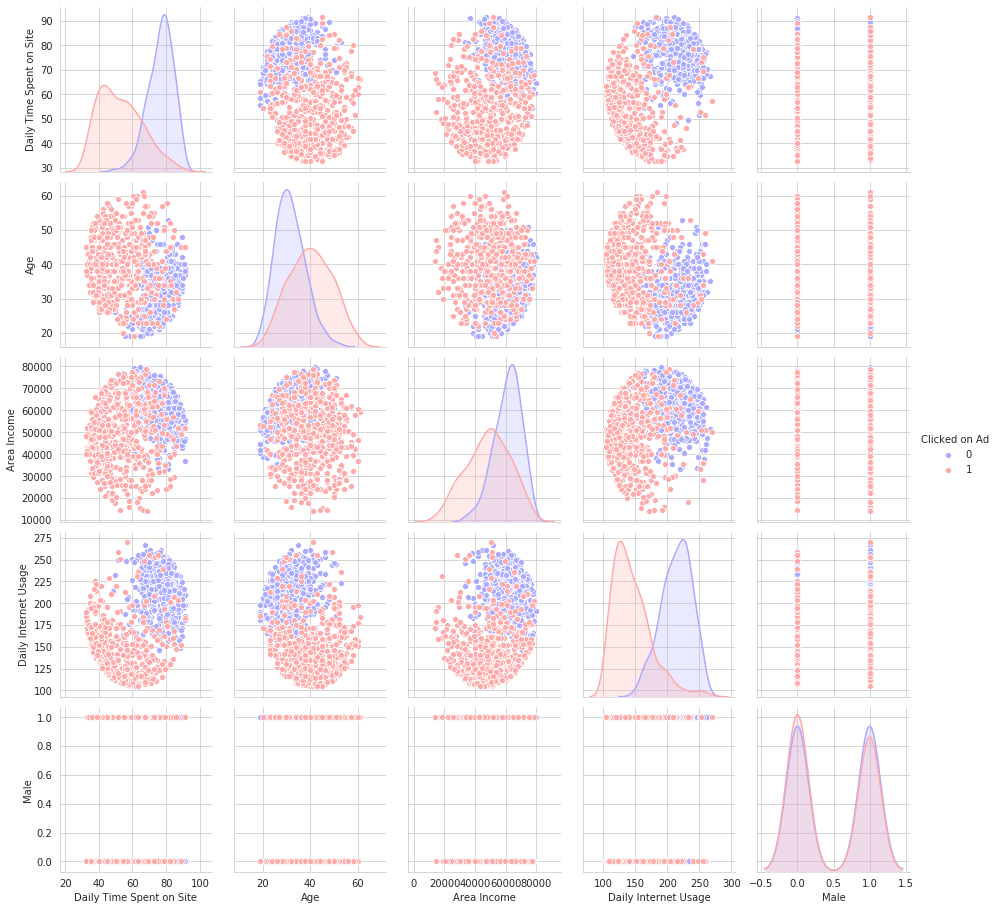

In [12]:
sns.pairplot(ad_data,hue='Clicked on Ad',palette='bwr')

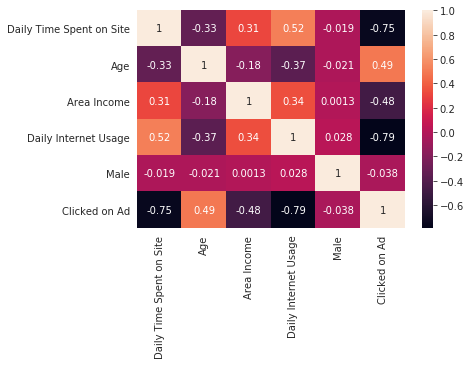

In [15]:
corr=AdX.iloc[:,:].corr() 
columns=corr.columns 
sns.heatmap(corr,annot=True)

# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

** Split the data into training set and testing set using train_test_split**

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
#Data Preprocessing
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']].values
y = ad_data['Clicked on Ad'].values

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

** Train and fit a logistic regression model on the training set.**

In [20]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Predictions and Evaluations
** Now predict values for the testing data.**

In [23]:
predictions = logmodel.predict(X_test)

** Create a classification report for the model.**

In [24]:
from sklearn.metrics import classification_report

In [25]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       136
           1       0.99      0.96      0.98       114

    accuracy                           0.98       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.98      0.98      0.98       250



In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, predictions)
print(cm)
accuracy_score(y_test, predictions)

[[135   1]
 [  4 110]]


0.98

In [27]:
#Hyperparameter tuning with Randomized Search CV
from scipy.stats import randint 
from sklearn.model_selection import RandomizedSearchCV 
  
# Creating the hyperparameter grid  
param_dist = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]} 
  
  
# Instantiating RandomizedSearchCV object 
log_cv = RandomizedSearchCV(logmodel,param_dist, cv = 10,scoring = "accuracy",n_jobs=-1) 
  
log_cv.fit(X_train, y_train) 
  
# Print the tuned parameters and score 
print("Tuned Logistic Regression Parameters: {}".format(log_cv.best_params_)) 
print("Best score is {}".format(log_cv.best_score_)) 

/home/nishant/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Tuned Logistic Regression Parameters: {'C': 1}
Best score is 0.9653333333333333


In [28]:
#Hyperparameter tuning with GridSearch CV
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]} 
grid_search = GridSearchCV(estimator = logmodel,
                           param_grid = param_grid,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 96.53 %
Best Parameters: {'C': 1}


In [29]:
#K-Cross Validation #Updated Logistic Regression with best Hyperparameters Selected

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = logmodel, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 96.53 %
Standard Deviation: 1.48 %


In [30]:
#KNN Approach

In [31]:
#Data Preprocessing
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']].values
y = ad_data['Clicked on Ad'].values

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [33]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [34]:
from sklearn.neighbors import KNeighborsClassifier
classifier1 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier1.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred1 = classifier1.predict(X_test)
cm = confusion_matrix(y_test, y_pred1)
print(cm)
accuracy_score(y_test, y_pred1)

[[136   0]
 [  8 106]]


0.968

In [36]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

# Instantiating RandomizedSearchCV object 
hyper_cv = RandomizedSearchCV(classifier1,hyperparameters, cv = 10,scoring = "accuracy",n_jobs=-1) 
  
hyper_cv.fit(X_train, y_train) 
  
# Print the tuned parameters and score 
print("Tuned KNN Parameters: {}".format(hyper_cv.best_params_)) 
print("Best score is {}".format(hyper_cv.best_score_)) 

Tuned KNN Parameters: {'p': 2, 'n_neighbors': 20, 'leaf_size': 44}
Best score is 0.9613333333333334


In [37]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
grid_search1 = GridSearchCV(estimator = classifier1,
                           param_grid = hyperparameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

grid_search1.fit(X_train, y_train)
best_accuracy_1 = grid_search1.best_score_
best_parameters_1 = grid_search1.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy_1*100))
print("Best Parameters:", best_parameters_1)

Best Accuracy: 96.27 %
Best Parameters: {'leaf_size': 1, 'n_neighbors': 11, 'p': 2}


In [38]:
classifier1_new = KNeighborsClassifier(n_neighbors = 11, metric = 'minkowski', p = 2,leaf_size=1)
classifier1_new.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred1_new = classifier1_new.predict(X_test)
cm = confusion_matrix(y_test, y_pred1_new)
print(cm)
accuracy_score(y_test, y_pred1_new)

[[136   0]
 [  7 107]]


0.972

In [40]:
#K-Cross Validation #Updated KNN with best Hyperparameters Selected

from sklearn.model_selection import cross_val_score
accuracies1 = cross_val_score(estimator = classifier1_new, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies1.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies1.std()*100))

Accuracy: 96.27 %
Standard Deviation: 1.55 %


In [41]:
#SVM Approach

In [42]:
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']].values
y = ad_data['Clicked on Ad'].values

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [45]:
from sklearn.svm import SVC
classifier2 = SVC(kernel = 'linear', random_state = 0)
classifier2.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred2 = classifier2.predict(X_test)
cm = confusion_matrix(y_test, y_pred2)
print(cm)
accuracy_score(y_test, y_pred2)

[[135   1]
 [  4 110]]


0.98

In [47]:
#Hyperparameter tuning with Randomized Search CV
from scipy.stats import randint 
from sklearn.model_selection import RandomizedSearchCV 
  
# Creating the hyperparameter grid  
param_dist2 = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear'],'degree':[1,2,3,4]},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],'degree':[1,2,3,4]}]
  
# Instantiating RandomizedSearchCV object 
tree_cv2 = RandomizedSearchCV(classifier2,param_dist2, cv = 10,scoring = "accuracy",n_jobs=-1) 
  
tree_cv2.fit(X_train, y_train) 
  
# Print the tuned parameters and score 
print("Tuned SVC Parameters: {}".format(tree_cv2.best_params_)) 
print("Best score is {}".format(tree_cv2.best_score_)) 

Tuned SVC Parameters: {'kernel': 'linear', 'degree': 3, 'C': 0.5}
Best score is 0.9666666666666666


In [48]:
#Hyperparameter tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV
parameters2 = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear'],'degree':[1,2,3,4]},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],'degree':[1,2,3,4]}]
grid_search2 = GridSearchCV(estimator = classifier2,
                           param_grid = parameters2,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search2.fit(X_train, y_train)
best_accuracy1 = grid_search2.best_score_
best_parameters2 = grid_search2.best_params_
print("Best r2_score: {:.2f} %".format(best_accuracy1*100))
print("Best Parameters:", best_parameters2)

Best r2_score: 96.80 %
Best Parameters: {'C': 0.25, 'degree': 1, 'kernel': 'linear'}


In [49]:
classifier2_new = SVC(kernel = 'linear',C=0.25, random_state = 0)
classifier2_new.fit(X_train, y_train)

SVC(C=0.25, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred2_new = classifier2_new.predict(X_test)
cm = confusion_matrix(y_test, y_pred2_new)
print(cm)
accuracy_score(y_test, y_pred2_new)

[[135   1]
 [  4 110]]


0.98

In [51]:
#K-Cross Validation #Updated SVC with best Hyperparameters Selected

from sklearn.model_selection import cross_val_score
accuracies2 = cross_val_score(estimator = classifier2_new, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies2.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies2.std()*100))


Accuracy: 96.80 %
Standard Deviation: 1.36 %


In [52]:
#Naive Bayes Approach

In [53]:
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']].values
y = ad_data['Clicked on Ad'].values

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [55]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [56]:
from sklearn.naive_bayes import GaussianNB
classifier3 = GaussianNB()
classifier3.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [57]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred3 = classifier3.predict(X_test)
cm = confusion_matrix(y_test, y_pred3)
print(cm)
accuracy_score(y_test, y_pred3)

[[132   4]
 [  4 110]]


0.968

In [58]:
#K-Cross Validation #Updated Naive Bayes with best Hyperparameters Selected

from sklearn.model_selection import cross_val_score
accuracies3 = cross_val_score(estimator = classifier3, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies3.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies3.std()*100))


Accuracy: 96.27 %
Standard Deviation: 1.31 %


In [59]:
#Decision Tree Classification Approach

In [60]:
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']].values
y = ad_data['Clicked on Ad'].values

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [62]:
from sklearn.tree import DecisionTreeClassifier
classifier4 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier4.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred4 = classifier4.predict(X_test)
cm = confusion_matrix(y_test, y_pred4)
print(cm)
accuracy_score(y_test, y_pred4)

[[130   6]
 [  4 110]]


0.96

In [64]:
#Hyperparameter tuning with Randomized Search CV
from scipy.stats import randint 
from sklearn.model_selection import RandomizedSearchCV 
  
# Creating the hyperparameter grid  
param_dist4 = {"max_depth": [2, 6, 8,10,12,14], 
              "max_features": randint(1, 9),
              "min_samples_split": randint(2,40),
              "min_samples_leaf": randint(1, 9),
              "max_leaf_nodes": randint(1, 100),
              "criterion": ["gini", "entropy"]} 
  
  
# Instantiating RandomizedSearchCV object 
tree_cv4 = RandomizedSearchCV(classifier4,param_dist4, cv = 10,scoring = "accuracy",n_jobs=-1) 
  
tree_cv4.fit(X_train, y_train) 
  
# Print the tuned parameters and score 
print("Tuned Decision Tree Parameters: {}".format(tree_cv4.best_params_)) 
print("Best score is {}".format(tree_cv4.best_score_)) 

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 3, 'max_leaf_nodes': 92, 'min_samples_leaf': 3, 'min_samples_split': 14}
Best score is 0.9426666666666665


In [65]:
from sklearn.model_selection import GridSearchCV
param_grid4 = {"criterion": ["gini", "entropy"],
              "min_samples_split": [2,4,10, 20,24,26],
              "max_features": [2,4,5,6],
              "max_depth": [8,10,12],
              "min_samples_leaf": [2,4,6,8,10,12],
              "max_leaf_nodes": [10,20,40,60,80,100]
              }
grid_search4 = GridSearchCV(estimator = classifier4,
                           param_grid = param_grid4,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search4.fit(X_train, y_train)
best_accuracy_score4 = grid_search4.best_score_
best_parameters4 = grid_search4.best_params_
print("Best Accuracy_score: {:.2f} %".format(best_accuracy_score4*100))
print("Best Parameters:", best_parameters4)

Best Accuracy_score: 95.07 %
Best Parameters: {'criterion': 'gini', 'max_depth': 8, 'max_features': 4, 'max_leaf_nodes': 20, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [66]:
classifier4_new = DecisionTreeClassifier(criterion = 'gini', random_state = 0,max_depth=8,max_features=4,min_samples_leaf=2,min_samples_split=2,max_leaf_nodes=20)
classifier4_new.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=4, max_leaf_nodes=20,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [67]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred4_new = classifier4_new.predict(X_test)
cm = confusion_matrix(y_test, y_pred4_new)
print(cm)
accuracy_score(y_test, y_pred4_new)

[[130   6]
 [  5 109]]


0.956

In [68]:
#K-Cross Validation #Updated Decision Tree with best Hyperparameters Selected

from sklearn.model_selection import cross_val_score
accuracies4 = cross_val_score(estimator = classifier4_new, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies4.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies4.std()*100))


Accuracy: 95.07 %
Standard Deviation: 2.74 %


In [69]:
#Random Forest Classifier

In [70]:
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']].values
y = ad_data['Clicked on Ad'].values

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [72]:
from sklearn.ensemble import RandomForestClassifier
classifier5 = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier5.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [73]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred5 = classifier5.predict(X_test)
cm = confusion_matrix(y_test, y_pred5)
print(cm)
accuracy_score(y_test, y_pred5)

[[132   4]
 [  4 110]]


0.968

In [74]:
#Hyperparameter tuning with Randomized Search CV
from scipy.stats import randint 
from sklearn.model_selection import RandomizedSearchCV 
  
# Creating the hyperparameter grid  
param_dist5 = {"n_estimators": [20,30,50,100],
            "max_features": ['auto', 'sqrt', 'log2'],
            "min_samples_split" : [2,4,6,8,10,20],
            "criterion": ["entropy", "gini"],
            "max_depth": [2, 6, 8,10,12]} 
  
  
# Instantiating RandomizedSearchCV object 
tree_cv5 = RandomizedSearchCV(classifier5,param_dist5, cv = 10,scoring = "accuracy",n_jobs=-1) 
  
tree_cv5.fit(X_train, y_train) 
  
# Print the tuned parameters and score 
print("Tuned Random Forest Parameters: {}".format(tree_cv5.best_params_)) 
print("Best score is {}".format(tree_cv5.best_score_)) 

Tuned Random Forest Parameters: {'n_estimators': 20, 'min_samples_split': 4, 'max_features': 'auto', 'max_depth': 6, 'criterion': 'entropy'}
Best score is 0.9626666666666666


In [75]:
from sklearn.model_selection import GridSearchCV
param_grid5 = {"n_estimators": [20,30,50,100],
            "max_features": ['auto', 'sqrt', 'log2'],
            "min_samples_split" : [2,4,6,8,10,20],
            "criterion": ["entropy", "gini"],
            "max_depth": [4,8,10,12]  
            }

grid_search5 = GridSearchCV(estimator = classifier5,
                           param_grid = param_grid5,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)
grid_search5.fit(X_train, y_train)
best_accuracy5 = grid_search5.best_score_
best_parameters5 = grid_search5.best_params_
print("Best Accuracy_score: {:.2f} %".format(best_accuracy5*100))
print("Best Parameters:", best_parameters5)


Best Accuracy_score: 96.27 %
Best Parameters: {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'min_samples_split': 6, 'n_estimators': 20}


In [76]:
classifier5_new = RandomForestClassifier(n_estimators = 20, criterion = 'gini', random_state = 0,max_depth=4,min_samples_split=6)
classifier5_new.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [77]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred5_new = classifier5_new.predict(X_test)
cm = confusion_matrix(y_test, y_pred5_new)
print(cm)
accuracy_score(y_test, y_pred5_new)

[[132   4]
 [  6 108]]


0.96

In [78]:
#K-Cross Validation #Updated Random Forest with best Hyperparameters Selected

from sklearn.model_selection import cross_val_score
accuracies5 = cross_val_score(estimator = classifier5_new, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies5.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies5.std()*100))


Accuracy: 95.73 %
Standard Deviation: 1.87 %


In [79]:
#XGBoost Classification

In [80]:
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']].values
y = ad_data['Clicked on Ad'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [81]:
from xgboost import XGBClassifier
classifier6 = XGBClassifier()
classifier6.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [82]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred6 = classifier6.predict(X_test)
cm = confusion_matrix(y_test, y_pred6)
print(cm)
accuracy_score(y_test, y_pred6)

[[132   4]
 [  5 109]]


0.964

In [83]:
#Hyperparameter tuning with Randomized Search CV
from scipy.stats import randint 
from sklearn.model_selection import RandomizedSearchCV 
  
# Creating the hyperparameter grid  
param_dist6 = {"n_estimators": [10,30,50,100,200],"min_child_weight":[1,2,3,4,5],
               "gamma":[0,0.1,0.2,0.3,0.4,0.5,0.6],
            "max_depth": [3,4,5,6,7,8,9,10],
            'subsample':[i/10.0 for i in range(6,10)],
            'colsample_bytree':[i/10.0 for i in range(6,10)],
            'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100],
              "learning_rate":[0.01,0.1,1]} 
  
  
# Instantiating RandomizedSearchCV object 
tree_cv6 = RandomizedSearchCV(classifier6,param_dist6, cv = 10,scoring = "accuracy",n_jobs=-1) 
  
tree_cv6.fit(X_train, y_train) 
  
# Print the tuned parameters and score 
print("Tuned XGboost Parameters: {}".format(tree_cv6.best_params_)) 
print("Best score is {}".format(tree_cv6.best_score_)) 

Tuned XGboost Parameters: {'subsample': 0.6, 'reg_alpha': 0.01, 'n_estimators': 50, 'min_child_weight': 2, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0.6, 'colsample_bytree': 0.6}
Best score is 0.96


In [84]:
classifier6_new = XGBClassifier(n_estimators = 50,subsample= 0.6,reg_alpha= 0.01 , random_state = 0,max_depth=4,
                                min_child_weight= 3,learning_rate= 0.01, gamma= 0.3, colsample_bytree= 0.6)
classifier6_new.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.3,
              learning_rate=0.01, max_delta_step=0, max_depth=4,
              min_child_weight=3, missing=None, n_estimators=50, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0.01, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6, verbosity=1)

In [85]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred6_new = classifier6_new.predict(X_test)
cm = confusion_matrix(y_test, y_pred6_new)
print(cm)
accuracy_score(y_test, y_pred6_new)

[[134   2]
 [  6 108]]


0.968

In [86]:
#K-Cross Validation #Updated XGBOOST Classifier with best Hyperparameters Selected

from sklearn.model_selection import cross_val_score
accuracies6 = cross_val_score(estimator = classifier6_new, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies6.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies6.std()*100))


Accuracy: 95.60 %
Standard Deviation: 1.58 %


In [87]:
#CatBoost Classifier
from catboost import CatBoostClassifier
classifier8 = CatBoostClassifier()
classifier8.fit(X_train, y_train)

Learning rate set to 0.009111
0:	learn: 0.6781005	total: 80ms	remaining: 1m 19s
1:	learn: 0.6636558	total: 82ms	remaining: 40.9s
2:	learn: 0.6489910	total: 84.8ms	remaining: 28.2s
3:	learn: 0.6343547	total: 89.6ms	remaining: 22.3s
4:	learn: 0.6199335	total: 92.2ms	remaining: 18.3s
5:	learn: 0.6053836	total: 95.8ms	remaining: 15.9s
6:	learn: 0.5926311	total: 97.5ms	remaining: 13.8s
7:	learn: 0.5803658	total: 100ms	remaining: 12.4s
8:	learn: 0.5698141	total: 104ms	remaining: 11.5s
9:	learn: 0.5581860	total: 106ms	remaining: 10.5s
10:	learn: 0.5474950	total: 107ms	remaining: 9.65s
11:	learn: 0.5361152	total: 109ms	remaining: 8.96s
12:	learn: 0.5249870	total: 111ms	remaining: 8.39s
13:	learn: 0.5134878	total: 112ms	remaining: 7.89s
14:	learn: 0.5037930	total: 114ms	remaining: 7.48s
15:	learn: 0.4935324	total: 116ms	remaining: 7.1s
16:	learn: 0.4833449	total: 117ms	remaining: 6.77s
17:	learn: 0.4732774	total: 119ms	remaining: 6.47s
18:	learn: 0.4655229	total: 120ms	remaining: 6.18s
19:	lear

164:	learn: 0.1070556	total: 534ms	remaining: 2.7s
165:	learn: 0.1065902	total: 537ms	remaining: 2.69s
166:	learn: 0.1060848	total: 539ms	remaining: 2.69s
167:	learn: 0.1055452	total: 540ms	remaining: 2.68s
168:	learn: 0.1052870	total: 542ms	remaining: 2.67s
169:	learn: 0.1048116	total: 544ms	remaining: 2.65s
170:	learn: 0.1043483	total: 546ms	remaining: 2.65s
171:	learn: 0.1038173	total: 548ms	remaining: 2.64s
172:	learn: 0.1034163	total: 557ms	remaining: 2.66s
173:	learn: 0.1031185	total: 562ms	remaining: 2.67s
174:	learn: 0.1027423	total: 567ms	remaining: 2.67s
175:	learn: 0.1022460	total: 570ms	remaining: 2.67s
176:	learn: 0.1018741	total: 571ms	remaining: 2.66s
177:	learn: 0.1013665	total: 573ms	remaining: 2.65s
178:	learn: 0.1010561	total: 575ms	remaining: 2.64s
179:	learn: 0.1007638	total: 578ms	remaining: 2.63s
180:	learn: 0.1003610	total: 580ms	remaining: 2.62s
181:	learn: 0.0999903	total: 581ms	remaining: 2.61s
182:	learn: 0.0996300	total: 583ms	remaining: 2.6s
183:	learn: 0.

384:	learn: 0.0607656	total: 912ms	remaining: 1.46s
385:	learn: 0.0606263	total: 914ms	remaining: 1.45s
386:	learn: 0.0605259	total: 917ms	remaining: 1.45s
387:	learn: 0.0604053	total: 919ms	remaining: 1.45s
388:	learn: 0.0602960	total: 921ms	remaining: 1.45s
389:	learn: 0.0602447	total: 923ms	remaining: 1.44s
390:	learn: 0.0601460	total: 925ms	remaining: 1.44s
391:	learn: 0.0600428	total: 927ms	remaining: 1.44s
392:	learn: 0.0600099	total: 929ms	remaining: 1.44s
393:	learn: 0.0598854	total: 931ms	remaining: 1.43s
394:	learn: 0.0598148	total: 933ms	remaining: 1.43s
395:	learn: 0.0596300	total: 935ms	remaining: 1.43s
396:	learn: 0.0595254	total: 938ms	remaining: 1.42s
397:	learn: 0.0593494	total: 940ms	remaining: 1.42s
398:	learn: 0.0592622	total: 942ms	remaining: 1.42s
399:	learn: 0.0591491	total: 944ms	remaining: 1.42s
400:	learn: 0.0590463	total: 945ms	remaining: 1.41s
401:	learn: 0.0588906	total: 947ms	remaining: 1.41s
402:	learn: 0.0588210	total: 952ms	remaining: 1.41s
403:	learn: 

592:	learn: 0.0423717	total: 1.29s	remaining: 883ms
593:	learn: 0.0423166	total: 1.29s	remaining: 881ms
594:	learn: 0.0422493	total: 1.29s	remaining: 879ms
595:	learn: 0.0421856	total: 1.29s	remaining: 876ms
596:	learn: 0.0420936	total: 1.29s	remaining: 874ms
597:	learn: 0.0420427	total: 1.3s	remaining: 872ms
598:	learn: 0.0419548	total: 1.3s	remaining: 869ms
599:	learn: 0.0418111	total: 1.3s	remaining: 867ms
600:	learn: 0.0417584	total: 1.3s	remaining: 865ms
601:	learn: 0.0416956	total: 1.3s	remaining: 862ms
602:	learn: 0.0416396	total: 1.31s	remaining: 860ms
603:	learn: 0.0415740	total: 1.31s	remaining: 858ms
604:	learn: 0.0414778	total: 1.31s	remaining: 856ms
605:	learn: 0.0413753	total: 1.31s	remaining: 854ms
606:	learn: 0.0413459	total: 1.31s	remaining: 851ms
607:	learn: 0.0413009	total: 1.32s	remaining: 850ms
608:	learn: 0.0412304	total: 1.32s	remaining: 847ms
609:	learn: 0.0411745	total: 1.32s	remaining: 845ms
610:	learn: 0.0411251	total: 1.32s	remaining: 842ms
611:	learn: 0.041

793:	learn: 0.0317019	total: 1.66s	remaining: 431ms
794:	learn: 0.0316626	total: 1.66s	remaining: 429ms
795:	learn: 0.0316243	total: 1.67s	remaining: 427ms
796:	learn: 0.0315838	total: 1.67s	remaining: 425ms
797:	learn: 0.0315665	total: 1.67s	remaining: 422ms
798:	learn: 0.0315451	total: 1.67s	remaining: 420ms
799:	learn: 0.0315262	total: 1.67s	remaining: 418ms
800:	learn: 0.0314821	total: 1.67s	remaining: 416ms
801:	learn: 0.0314617	total: 1.68s	remaining: 414ms
802:	learn: 0.0314389	total: 1.68s	remaining: 412ms
803:	learn: 0.0314158	total: 1.68s	remaining: 410ms
804:	learn: 0.0313835	total: 1.68s	remaining: 407ms
805:	learn: 0.0313733	total: 1.68s	remaining: 405ms
806:	learn: 0.0313357	total: 1.69s	remaining: 403ms
807:	learn: 0.0312666	total: 1.69s	remaining: 401ms
808:	learn: 0.0312405	total: 1.69s	remaining: 399ms
809:	learn: 0.0311486	total: 1.69s	remaining: 397ms
810:	learn: 0.0311149	total: 1.69s	remaining: 395ms
811:	learn: 0.0310654	total: 1.7s	remaining: 393ms
812:	learn: 0

986:	learn: 0.0252725	total: 2.03s	remaining: 26.7ms
987:	learn: 0.0252556	total: 2.03s	remaining: 24.7ms
988:	learn: 0.0252298	total: 2.03s	remaining: 22.6ms
989:	learn: 0.0251880	total: 2.04s	remaining: 20.6ms
990:	learn: 0.0251684	total: 2.04s	remaining: 18.5ms
991:	learn: 0.0251252	total: 2.04s	remaining: 16.5ms
992:	learn: 0.0251025	total: 2.04s	remaining: 14.4ms
993:	learn: 0.0250840	total: 2.04s	remaining: 12.3ms
994:	learn: 0.0250566	total: 2.05s	remaining: 10.3ms
995:	learn: 0.0250141	total: 2.05s	remaining: 8.22ms
996:	learn: 0.0249907	total: 2.05s	remaining: 6.17ms
997:	learn: 0.0249693	total: 2.05s	remaining: 4.11ms
998:	learn: 0.0249355	total: 2.05s	remaining: 2.06ms
999:	learn: 0.0249187	total: 2.06s	remaining: 0us


In [88]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred8 = classifier8.predict(X_test)
cm = confusion_matrix(y_test, y_pred8)
print(cm)
accuracy_score(y_test, y_pred8)

[[133   3]
 [  5 109]]


0.968

In [89]:
#K-Cross Validation #Updated CatBOOST Classifier with best Hyperparameters Selected

from sklearn.model_selection import cross_val_score
accuracies8 = cross_val_score(estimator = classifier8, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies8.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies8.std()*100))


Learning rate set to 0.008711
0:	learn: 0.6788719	total: 2.25ms	remaining: 2.24s
1:	learn: 0.6653690	total: 3.9ms	remaining: 1.95s
2:	learn: 0.6515929	total: 5.45ms	remaining: 1.81s
3:	learn: 0.6388029	total: 6.99ms	remaining: 1.74s
4:	learn: 0.6250420	total: 8.67ms	remaining: 1.72s
5:	learn: 0.6110652	total: 10.2ms	remaining: 1.69s
6:	learn: 0.5976437	total: 12ms	remaining: 1.71s
7:	learn: 0.5852339	total: 13.6ms	remaining: 1.69s
8:	learn: 0.5750641	total: 15.5ms	remaining: 1.71s
9:	learn: 0.5642213	total: 17.5ms	remaining: 1.73s
10:	learn: 0.5540264	total: 18.7ms	remaining: 1.68s
11:	learn: 0.5434653	total: 20.3ms	remaining: 1.67s
12:	learn: 0.5329757	total: 22ms	remaining: 1.67s
13:	learn: 0.5220613	total: 24.6ms	remaining: 1.73s
14:	learn: 0.5125677	total: 26.8ms	remaining: 1.76s
15:	learn: 0.5022013	total: 32.9ms	remaining: 2.02s
16:	learn: 0.4925713	total: 34.5ms	remaining: 1.99s
17:	learn: 0.4827369	total: 36ms	remaining: 1.96s
18:	learn: 0.4751919	total: 37.2ms	remaining: 1.92s

169:	learn: 0.1070155	total: 371ms	remaining: 1.81s
170:	learn: 0.1064911	total: 376ms	remaining: 1.82s
171:	learn: 0.1060801	total: 378ms	remaining: 1.82s
172:	learn: 0.1055810	total: 380ms	remaining: 1.82s
173:	learn: 0.1050649	total: 382ms	remaining: 1.81s
174:	learn: 0.1044795	total: 384ms	remaining: 1.81s
175:	learn: 0.1040990	total: 386ms	remaining: 1.81s
176:	learn: 0.1038910	total: 387ms	remaining: 1.8s
177:	learn: 0.1034170	total: 389ms	remaining: 1.8s
178:	learn: 0.1031132	total: 391ms	remaining: 1.79s
179:	learn: 0.1026436	total: 393ms	remaining: 1.79s
180:	learn: 0.1021495	total: 396ms	remaining: 1.79s
181:	learn: 0.1015833	total: 407ms	remaining: 1.83s
182:	learn: 0.1012450	total: 409ms	remaining: 1.83s
183:	learn: 0.1006535	total: 411ms	remaining: 1.82s
184:	learn: 0.1002136	total: 413ms	remaining: 1.82s
185:	learn: 0.0996668	total: 415ms	remaining: 1.81s
186:	learn: 0.0992819	total: 416ms	remaining: 1.81s
187:	learn: 0.0988541	total: 418ms	remaining: 1.8s
188:	learn: 0.0

371:	learn: 0.0600333	total: 748ms	remaining: 1.26s
372:	learn: 0.0598892	total: 750ms	remaining: 1.26s
373:	learn: 0.0597629	total: 752ms	remaining: 1.26s
374:	learn: 0.0597112	total: 754ms	remaining: 1.26s
375:	learn: 0.0595774	total: 756ms	remaining: 1.25s
376:	learn: 0.0593900	total: 758ms	remaining: 1.25s
377:	learn: 0.0592651	total: 760ms	remaining: 1.25s
378:	learn: 0.0590423	total: 762ms	remaining: 1.25s
379:	learn: 0.0588679	total: 763ms	remaining: 1.25s
380:	learn: 0.0587456	total: 765ms	remaining: 1.24s
381:	learn: 0.0586716	total: 767ms	remaining: 1.24s
382:	learn: 0.0585798	total: 769ms	remaining: 1.24s
383:	learn: 0.0584433	total: 771ms	remaining: 1.24s
384:	learn: 0.0582776	total: 773ms	remaining: 1.23s
385:	learn: 0.0580504	total: 775ms	remaining: 1.23s
386:	learn: 0.0579361	total: 776ms	remaining: 1.23s
387:	learn: 0.0578682	total: 778ms	remaining: 1.23s
388:	learn: 0.0576983	total: 780ms	remaining: 1.23s
389:	learn: 0.0576153	total: 782ms	remaining: 1.22s
390:	learn: 

589:	learn: 0.0394611	total: 1.12s	remaining: 778ms
590:	learn: 0.0394144	total: 1.12s	remaining: 776ms
591:	learn: 0.0393695	total: 1.13s	remaining: 776ms
592:	learn: 0.0392790	total: 1.13s	remaining: 774ms
593:	learn: 0.0392353	total: 1.13s	remaining: 772ms
594:	learn: 0.0391930	total: 1.13s	remaining: 770ms
595:	learn: 0.0391497	total: 1.13s	remaining: 768ms
596:	learn: 0.0391123	total: 1.14s	remaining: 767ms
597:	learn: 0.0390720	total: 1.14s	remaining: 765ms
598:	learn: 0.0389976	total: 1.14s	remaining: 763ms
599:	learn: 0.0389408	total: 1.14s	remaining: 761ms
600:	learn: 0.0388728	total: 1.14s	remaining: 759ms
601:	learn: 0.0388334	total: 1.14s	remaining: 757ms
602:	learn: 0.0387464	total: 1.15s	remaining: 755ms
603:	learn: 0.0386483	total: 1.15s	remaining: 753ms
604:	learn: 0.0385821	total: 1.15s	remaining: 751ms
605:	learn: 0.0385074	total: 1.15s	remaining: 749ms
606:	learn: 0.0384594	total: 1.15s	remaining: 747ms
607:	learn: 0.0383520	total: 1.15s	remaining: 745ms
608:	learn: 

809:	learn: 0.0291083	total: 1.49s	remaining: 350ms
810:	learn: 0.0290882	total: 1.5s	remaining: 349ms
811:	learn: 0.0290499	total: 1.5s	remaining: 347ms
812:	learn: 0.0290048	total: 1.5s	remaining: 345ms
813:	learn: 0.0289814	total: 1.5s	remaining: 343ms
814:	learn: 0.0289213	total: 1.5s	remaining: 341ms
815:	learn: 0.0288973	total: 1.51s	remaining: 340ms
816:	learn: 0.0288128	total: 1.51s	remaining: 338ms
817:	learn: 0.0287907	total: 1.51s	remaining: 337ms
818:	learn: 0.0287194	total: 1.51s	remaining: 335ms
819:	learn: 0.0286720	total: 1.52s	remaining: 333ms
820:	learn: 0.0285852	total: 1.52s	remaining: 331ms
821:	learn: 0.0285334	total: 1.52s	remaining: 329ms
822:	learn: 0.0284939	total: 1.52s	remaining: 328ms
823:	learn: 0.0284717	total: 1.52s	remaining: 326ms
824:	learn: 0.0284429	total: 1.53s	remaining: 324ms
825:	learn: 0.0283954	total: 1.53s	remaining: 322ms
826:	learn: 0.0283702	total: 1.53s	remaining: 320ms
827:	learn: 0.0283054	total: 1.53s	remaining: 319ms
828:	learn: 0.028

967:	learn: 0.0243297	total: 1.88s	remaining: 62ms
968:	learn: 0.0242948	total: 1.89s	remaining: 60.4ms
969:	learn: 0.0242559	total: 1.89s	remaining: 58.5ms
970:	learn: 0.0242309	total: 1.89s	remaining: 56.5ms
971:	learn: 0.0242126	total: 1.9s	remaining: 54.6ms
972:	learn: 0.0241956	total: 1.9s	remaining: 52.6ms
973:	learn: 0.0241821	total: 1.9s	remaining: 50.7ms
974:	learn: 0.0241525	total: 1.9s	remaining: 48.7ms
975:	learn: 0.0241380	total: 1.9s	remaining: 46.8ms
976:	learn: 0.0241238	total: 1.91s	remaining: 44.9ms
977:	learn: 0.0240999	total: 1.91s	remaining: 42.9ms
978:	learn: 0.0240833	total: 1.91s	remaining: 41ms
979:	learn: 0.0240546	total: 1.91s	remaining: 39ms
980:	learn: 0.0240418	total: 1.91s	remaining: 37ms
981:	learn: 0.0240164	total: 1.91s	remaining: 35.1ms
982:	learn: 0.0239872	total: 1.92s	remaining: 33.1ms
983:	learn: 0.0239642	total: 1.92s	remaining: 31.2ms
984:	learn: 0.0239513	total: 1.92s	remaining: 29.2ms
985:	learn: 0.0239127	total: 1.92s	remaining: 27.3ms
986:	l

172:	learn: 0.1043472	total: 371ms	remaining: 1.77s
173:	learn: 0.1039555	total: 375ms	remaining: 1.78s
174:	learn: 0.1035395	total: 377ms	remaining: 1.78s
175:	learn: 0.1031580	total: 379ms	remaining: 1.77s
176:	learn: 0.1026954	total: 385ms	remaining: 1.79s
177:	learn: 0.1022746	total: 387ms	remaining: 1.79s
178:	learn: 0.1017251	total: 389ms	remaining: 1.78s
179:	learn: 0.1012781	total: 391ms	remaining: 1.78s
180:	learn: 0.1007697	total: 393ms	remaining: 1.78s
181:	learn: 0.1003555	total: 395ms	remaining: 1.77s
182:	learn: 0.1000637	total: 397ms	remaining: 1.77s
183:	learn: 0.0995967	total: 401ms	remaining: 1.78s
184:	learn: 0.0991873	total: 405ms	remaining: 1.78s
185:	learn: 0.0989978	total: 406ms	remaining: 1.77s
186:	learn: 0.0985954	total: 408ms	remaining: 1.77s
187:	learn: 0.0983205	total: 410ms	remaining: 1.77s
188:	learn: 0.0979234	total: 412ms	remaining: 1.77s
189:	learn: 0.0975556	total: 414ms	remaining: 1.76s
190:	learn: 0.0972325	total: 416ms	remaining: 1.76s
191:	learn: 

332:	learn: 0.0669344	total: 747ms	remaining: 1.5s
333:	learn: 0.0668050	total: 749ms	remaining: 1.49s
334:	learn: 0.0666598	total: 752ms	remaining: 1.49s
335:	learn: 0.0665382	total: 754ms	remaining: 1.49s
336:	learn: 0.0663971	total: 756ms	remaining: 1.49s
337:	learn: 0.0661436	total: 757ms	remaining: 1.48s
338:	learn: 0.0660233	total: 759ms	remaining: 1.48s
339:	learn: 0.0658371	total: 760ms	remaining: 1.48s
340:	learn: 0.0656669	total: 762ms	remaining: 1.47s
341:	learn: 0.0655760	total: 763ms	remaining: 1.47s
342:	learn: 0.0654796	total: 765ms	remaining: 1.46s
343:	learn: 0.0653091	total: 767ms	remaining: 1.46s
344:	learn: 0.0651577	total: 771ms	remaining: 1.46s
345:	learn: 0.0649973	total: 773ms	remaining: 1.46s
346:	learn: 0.0648632	total: 775ms	remaining: 1.46s
347:	learn: 0.0646810	total: 777ms	remaining: 1.46s
348:	learn: 0.0645617	total: 779ms	remaining: 1.45s
349:	learn: 0.0644437	total: 782ms	remaining: 1.45s
350:	learn: 0.0643384	total: 784ms	remaining: 1.45s
351:	learn: 0

533:	learn: 0.0462177	total: 1.12s	remaining: 979ms
534:	learn: 0.0461556	total: 1.12s	remaining: 977ms
535:	learn: 0.0460739	total: 1.13s	remaining: 974ms
536:	learn: 0.0459941	total: 1.13s	remaining: 972ms
537:	learn: 0.0459191	total: 1.13s	remaining: 970ms
538:	learn: 0.0458220	total: 1.13s	remaining: 968ms
539:	learn: 0.0457214	total: 1.13s	remaining: 965ms
540:	learn: 0.0456833	total: 1.13s	remaining: 963ms
541:	learn: 0.0455935	total: 1.14s	remaining: 961ms
542:	learn: 0.0455241	total: 1.14s	remaining: 958ms
543:	learn: 0.0454141	total: 1.14s	remaining: 956ms
544:	learn: 0.0453424	total: 1.14s	remaining: 954ms
545:	learn: 0.0452663	total: 1.15s	remaining: 952ms
546:	learn: 0.0452132	total: 1.15s	remaining: 950ms
547:	learn: 0.0451692	total: 1.15s	remaining: 948ms
548:	learn: 0.0451062	total: 1.15s	remaining: 945ms
549:	learn: 0.0450521	total: 1.15s	remaining: 943ms
550:	learn: 0.0449805	total: 1.15s	remaining: 941ms
551:	learn: 0.0448895	total: 1.16s	remaining: 938ms
552:	learn: 

750:	learn: 0.0332440	total: 1.49s	remaining: 495ms
751:	learn: 0.0332058	total: 1.49s	remaining: 493ms
752:	learn: 0.0331574	total: 1.5s	remaining: 491ms
753:	learn: 0.0331205	total: 1.5s	remaining: 489ms
754:	learn: 0.0330753	total: 1.5s	remaining: 487ms
755:	learn: 0.0330082	total: 1.5s	remaining: 484ms
756:	learn: 0.0329556	total: 1.5s	remaining: 482ms
757:	learn: 0.0329175	total: 1.5s	remaining: 480ms
758:	learn: 0.0328614	total: 1.51s	remaining: 478ms
759:	learn: 0.0327993	total: 1.51s	remaining: 476ms
760:	learn: 0.0327740	total: 1.51s	remaining: 474ms
761:	learn: 0.0327339	total: 1.51s	remaining: 472ms
762:	learn: 0.0326984	total: 1.51s	remaining: 470ms
763:	learn: 0.0326707	total: 1.51s	remaining: 468ms
764:	learn: 0.0326008	total: 1.52s	remaining: 466ms
765:	learn: 0.0325565	total: 1.52s	remaining: 464ms
766:	learn: 0.0325152	total: 1.52s	remaining: 462ms
767:	learn: 0.0324752	total: 1.52s	remaining: 460ms
768:	learn: 0.0324270	total: 1.52s	remaining: 458ms
769:	learn: 0.0323

948:	learn: 0.0258233	total: 1.87s	remaining: 100ms
949:	learn: 0.0257831	total: 1.87s	remaining: 98.6ms
950:	learn: 0.0257496	total: 1.87s	remaining: 96.6ms
951:	learn: 0.0257341	total: 1.88s	remaining: 94.6ms
952:	learn: 0.0257067	total: 1.88s	remaining: 92.6ms
953:	learn: 0.0256569	total: 1.88s	remaining: 90.6ms
954:	learn: 0.0256272	total: 1.88s	remaining: 88.7ms
955:	learn: 0.0255778	total: 1.89s	remaining: 86.9ms
956:	learn: 0.0255483	total: 1.89s	remaining: 84.9ms
957:	learn: 0.0255134	total: 1.89s	remaining: 82.9ms
958:	learn: 0.0254889	total: 1.89s	remaining: 80.9ms
959:	learn: 0.0254467	total: 1.89s	remaining: 79ms
960:	learn: 0.0254160	total: 1.9s	remaining: 77ms
961:	learn: 0.0253871	total: 1.9s	remaining: 75ms
962:	learn: 0.0253516	total: 1.9s	remaining: 73.1ms
963:	learn: 0.0253140	total: 1.9s	remaining: 71.1ms
964:	learn: 0.0252788	total: 1.91s	remaining: 69.1ms
965:	learn: 0.0252573	total: 1.91s	remaining: 67.2ms
966:	learn: 0.0252427	total: 1.91s	remaining: 65.2ms
967:

200:	learn: 0.0940589	total: 389ms	remaining: 1.54s
201:	learn: 0.0937407	total: 396ms	remaining: 1.56s
202:	learn: 0.0934762	total: 399ms	remaining: 1.56s
203:	learn: 0.0931133	total: 401ms	remaining: 1.56s
204:	learn: 0.0927924	total: 406ms	remaining: 1.58s
205:	learn: 0.0924977	total: 408ms	remaining: 1.57s
206:	learn: 0.0921527	total: 410ms	remaining: 1.57s
207:	learn: 0.0918603	total: 412ms	remaining: 1.57s
208:	learn: 0.0916460	total: 416ms	remaining: 1.57s
209:	learn: 0.0913816	total: 422ms	remaining: 1.59s
210:	learn: 0.0910546	total: 423ms	remaining: 1.58s
211:	learn: 0.0907558	total: 425ms	remaining: 1.58s
212:	learn: 0.0905228	total: 427ms	remaining: 1.57s
213:	learn: 0.0902061	total: 428ms	remaining: 1.57s
214:	learn: 0.0898628	total: 430ms	remaining: 1.57s
215:	learn: 0.0895131	total: 432ms	remaining: 1.57s
216:	learn: 0.0891756	total: 433ms	remaining: 1.56s
217:	learn: 0.0888555	total: 435ms	remaining: 1.56s
218:	learn: 0.0886150	total: 436ms	remaining: 1.55s
219:	learn: 

420:	learn: 0.0563585	total: 764ms	remaining: 1.05s
421:	learn: 0.0561932	total: 767ms	remaining: 1.05s
422:	learn: 0.0560626	total: 771ms	remaining: 1.05s
423:	learn: 0.0559339	total: 773ms	remaining: 1.05s
424:	learn: 0.0558624	total: 774ms	remaining: 1.05s
425:	learn: 0.0557417	total: 776ms	remaining: 1.04s
426:	learn: 0.0556118	total: 780ms	remaining: 1.05s
427:	learn: 0.0555890	total: 781ms	remaining: 1.04s
428:	learn: 0.0555333	total: 783ms	remaining: 1.04s
429:	learn: 0.0554111	total: 785ms	remaining: 1.04s
430:	learn: 0.0552864	total: 788ms	remaining: 1.04s
431:	learn: 0.0551731	total: 790ms	remaining: 1.04s
432:	learn: 0.0550869	total: 792ms	remaining: 1.04s
433:	learn: 0.0549716	total: 793ms	remaining: 1.03s
434:	learn: 0.0548111	total: 796ms	remaining: 1.03s
435:	learn: 0.0547582	total: 799ms	remaining: 1.03s
436:	learn: 0.0547386	total: 802ms	remaining: 1.03s
437:	learn: 0.0546420	total: 804ms	remaining: 1.03s
438:	learn: 0.0545110	total: 805ms	remaining: 1.03s
439:	learn: 

650:	learn: 0.0388438	total: 1.14s	remaining: 611ms
651:	learn: 0.0388060	total: 1.14s	remaining: 609ms
652:	learn: 0.0387005	total: 1.14s	remaining: 607ms
653:	learn: 0.0386131	total: 1.14s	remaining: 606ms
654:	learn: 0.0385716	total: 1.15s	remaining: 604ms
655:	learn: 0.0385203	total: 1.15s	remaining: 602ms
656:	learn: 0.0384566	total: 1.15s	remaining: 601ms
657:	learn: 0.0384201	total: 1.15s	remaining: 599ms
658:	learn: 0.0383538	total: 1.15s	remaining: 597ms
659:	learn: 0.0383017	total: 1.16s	remaining: 595ms
660:	learn: 0.0382375	total: 1.16s	remaining: 594ms
661:	learn: 0.0381585	total: 1.16s	remaining: 592ms
662:	learn: 0.0381023	total: 1.16s	remaining: 590ms
663:	learn: 0.0380591	total: 1.16s	remaining: 589ms
664:	learn: 0.0380053	total: 1.17s	remaining: 587ms
665:	learn: 0.0379652	total: 1.17s	remaining: 585ms
666:	learn: 0.0379107	total: 1.17s	remaining: 584ms
667:	learn: 0.0378386	total: 1.17s	remaining: 582ms
668:	learn: 0.0378131	total: 1.17s	remaining: 580ms
669:	learn: 

876:	learn: 0.0285436	total: 1.51s	remaining: 212ms
877:	learn: 0.0285184	total: 1.51s	remaining: 210ms
878:	learn: 0.0284968	total: 1.52s	remaining: 209ms
879:	learn: 0.0284668	total: 1.52s	remaining: 207ms
880:	learn: 0.0284212	total: 1.52s	remaining: 205ms
881:	learn: 0.0283920	total: 1.52s	remaining: 204ms
882:	learn: 0.0283586	total: 1.52s	remaining: 202ms
883:	learn: 0.0283348	total: 1.52s	remaining: 200ms
884:	learn: 0.0283108	total: 1.53s	remaining: 199ms
885:	learn: 0.0282937	total: 1.53s	remaining: 197ms
886:	learn: 0.0282567	total: 1.53s	remaining: 195ms
887:	learn: 0.0282365	total: 1.53s	remaining: 193ms
888:	learn: 0.0281914	total: 1.53s	remaining: 192ms
889:	learn: 0.0281640	total: 1.54s	remaining: 190ms
890:	learn: 0.0281315	total: 1.54s	remaining: 188ms
891:	learn: 0.0281118	total: 1.54s	remaining: 187ms
892:	learn: 0.0280780	total: 1.54s	remaining: 185ms
893:	learn: 0.0280393	total: 1.54s	remaining: 183ms
894:	learn: 0.0280113	total: 1.55s	remaining: 181ms
895:	learn: 

58:	learn: 0.2526111	total: 185ms	remaining: 2.94s
59:	learn: 0.2489596	total: 187ms	remaining: 2.93s
60:	learn: 0.2461513	total: 190ms	remaining: 2.92s
61:	learn: 0.2430755	total: 196ms	remaining: 2.96s
62:	learn: 0.2399098	total: 201ms	remaining: 2.98s
63:	learn: 0.2366275	total: 205ms	remaining: 2.99s
64:	learn: 0.2333249	total: 215ms	remaining: 3.09s
65:	learn: 0.2309619	total: 220ms	remaining: 3.11s
66:	learn: 0.2283513	total: 224ms	remaining: 3.12s
67:	learn: 0.2258767	total: 231ms	remaining: 3.17s
68:	learn: 0.2230795	total: 235ms	remaining: 3.17s
69:	learn: 0.2202338	total: 237ms	remaining: 3.15s
70:	learn: 0.2173395	total: 240ms	remaining: 3.14s
71:	learn: 0.2149759	total: 247ms	remaining: 3.19s
72:	learn: 0.2121790	total: 249ms	remaining: 3.17s
73:	learn: 0.2100371	total: 251ms	remaining: 3.14s
74:	learn: 0.2078299	total: 256ms	remaining: 3.16s
75:	learn: 0.2054563	total: 264ms	remaining: 3.2s
76:	learn: 0.2028229	total: 266ms	remaining: 3.18s
77:	learn: 0.2006111	total: 267m

332:	learn: 0.0656055	total: 742ms	remaining: 1.49s
333:	learn: 0.0655000	total: 744ms	remaining: 1.48s
334:	learn: 0.0653879	total: 746ms	remaining: 1.48s
335:	learn: 0.0652789	total: 749ms	remaining: 1.48s
336:	learn: 0.0651101	total: 750ms	remaining: 1.48s
337:	learn: 0.0649495	total: 752ms	remaining: 1.47s
338:	learn: 0.0648284	total: 754ms	remaining: 1.47s
339:	learn: 0.0646300	total: 756ms	remaining: 1.47s
340:	learn: 0.0645105	total: 758ms	remaining: 1.46s
341:	learn: 0.0643599	total: 760ms	remaining: 1.46s
342:	learn: 0.0642145	total: 762ms	remaining: 1.46s
343:	learn: 0.0641055	total: 763ms	remaining: 1.46s
344:	learn: 0.0638961	total: 765ms	remaining: 1.45s
345:	learn: 0.0637519	total: 767ms	remaining: 1.45s
346:	learn: 0.0636064	total: 769ms	remaining: 1.45s
347:	learn: 0.0635137	total: 771ms	remaining: 1.44s
348:	learn: 0.0634045	total: 773ms	remaining: 1.44s
349:	learn: 0.0632511	total: 774ms	remaining: 1.44s
350:	learn: 0.0631708	total: 776ms	remaining: 1.44s
351:	learn: 

540:	learn: 0.0449226	total: 1.31s	remaining: 1.11s
541:	learn: 0.0448286	total: 1.32s	remaining: 1.11s
542:	learn: 0.0447352	total: 1.32s	remaining: 1.11s
543:	learn: 0.0446773	total: 1.32s	remaining: 1.11s
544:	learn: 0.0446290	total: 1.32s	remaining: 1.11s
545:	learn: 0.0445630	total: 1.33s	remaining: 1.1s
546:	learn: 0.0445049	total: 1.33s	remaining: 1.1s
547:	learn: 0.0444370	total: 1.33s	remaining: 1.1s
548:	learn: 0.0443981	total: 1.34s	remaining: 1.1s
549:	learn: 0.0443295	total: 1.34s	remaining: 1.09s
550:	learn: 0.0442606	total: 1.34s	remaining: 1.09s
551:	learn: 0.0442331	total: 1.34s	remaining: 1.09s
552:	learn: 0.0441875	total: 1.34s	remaining: 1.09s
553:	learn: 0.0441230	total: 1.35s	remaining: 1.09s
554:	learn: 0.0440583	total: 1.35s	remaining: 1.08s
555:	learn: 0.0440239	total: 1.35s	remaining: 1.08s
556:	learn: 0.0439328	total: 1.35s	remaining: 1.08s
557:	learn: 0.0439040	total: 1.36s	remaining: 1.07s
558:	learn: 0.0438159	total: 1.36s	remaining: 1.07s
559:	learn: 0.04

722:	learn: 0.0339203	total: 1.69s	remaining: 647ms
723:	learn: 0.0338364	total: 1.69s	remaining: 645ms
724:	learn: 0.0338006	total: 1.69s	remaining: 642ms
725:	learn: 0.0337635	total: 1.69s	remaining: 640ms
726:	learn: 0.0337182	total: 1.7s	remaining: 637ms
727:	learn: 0.0336809	total: 1.7s	remaining: 635ms
728:	learn: 0.0336443	total: 1.7s	remaining: 632ms
729:	learn: 0.0335951	total: 1.7s	remaining: 630ms
730:	learn: 0.0335590	total: 1.7s	remaining: 627ms
731:	learn: 0.0335019	total: 1.71s	remaining: 625ms
732:	learn: 0.0334472	total: 1.71s	remaining: 622ms
733:	learn: 0.0334052	total: 1.71s	remaining: 619ms
734:	learn: 0.0333549	total: 1.71s	remaining: 617ms
735:	learn: 0.0333198	total: 1.71s	remaining: 614ms
736:	learn: 0.0332934	total: 1.72s	remaining: 612ms
737:	learn: 0.0332165	total: 1.72s	remaining: 610ms
738:	learn: 0.0331669	total: 1.72s	remaining: 607ms
739:	learn: 0.0331379	total: 1.72s	remaining: 605ms
740:	learn: 0.0330982	total: 1.72s	remaining: 602ms
741:	learn: 0.033

933:	learn: 0.0262719	total: 2.06s	remaining: 146ms
934:	learn: 0.0262434	total: 2.06s	remaining: 144ms
935:	learn: 0.0262143	total: 2.07s	remaining: 141ms
936:	learn: 0.0261852	total: 2.07s	remaining: 139ms
937:	learn: 0.0261686	total: 2.07s	remaining: 137ms
938:	learn: 0.0261375	total: 2.07s	remaining: 135ms
939:	learn: 0.0261205	total: 2.07s	remaining: 132ms
940:	learn: 0.0260926	total: 2.08s	remaining: 130ms
941:	learn: 0.0260754	total: 2.08s	remaining: 128ms
942:	learn: 0.0260422	total: 2.08s	remaining: 126ms
943:	learn: 0.0260321	total: 2.08s	remaining: 123ms
944:	learn: 0.0260031	total: 2.08s	remaining: 121ms
945:	learn: 0.0259814	total: 2.08s	remaining: 119ms
946:	learn: 0.0259476	total: 2.08s	remaining: 117ms
947:	learn: 0.0259295	total: 2.09s	remaining: 114ms
948:	learn: 0.0258777	total: 2.09s	remaining: 112ms
949:	learn: 0.0258245	total: 2.09s	remaining: 110ms
950:	learn: 0.0257810	total: 2.09s	remaining: 108ms
951:	learn: 0.0257509	total: 2.09s	remaining: 106ms
952:	learn: 

93:	learn: 0.1689499	total: 184ms	remaining: 1.77s
94:	learn: 0.1674739	total: 187ms	remaining: 1.78s
95:	learn: 0.1661264	total: 189ms	remaining: 1.78s
96:	learn: 0.1645767	total: 191ms	remaining: 1.78s
97:	learn: 0.1631538	total: 193ms	remaining: 1.77s
98:	learn: 0.1616084	total: 194ms	remaining: 1.77s
99:	learn: 0.1603820	total: 197ms	remaining: 1.77s
100:	learn: 0.1591002	total: 198ms	remaining: 1.76s
101:	learn: 0.1576797	total: 200ms	remaining: 1.76s
102:	learn: 0.1565399	total: 201ms	remaining: 1.75s
103:	learn: 0.1552889	total: 203ms	remaining: 1.75s
104:	learn: 0.1538154	total: 204ms	remaining: 1.74s
105:	learn: 0.1523341	total: 206ms	remaining: 1.74s
106:	learn: 0.1508841	total: 207ms	remaining: 1.73s
107:	learn: 0.1497549	total: 209ms	remaining: 1.73s
108:	learn: 0.1483459	total: 211ms	remaining: 1.72s
109:	learn: 0.1469412	total: 212ms	remaining: 1.72s
110:	learn: 0.1457569	total: 214ms	remaining: 1.71s
111:	learn: 0.1446774	total: 215ms	remaining: 1.71s
112:	learn: 0.14363

315:	learn: 0.0644560	total: 560ms	remaining: 1.21s
316:	learn: 0.0643927	total: 562ms	remaining: 1.21s
317:	learn: 0.0642363	total: 565ms	remaining: 1.21s
318:	learn: 0.0640781	total: 567ms	remaining: 1.21s
319:	learn: 0.0639616	total: 568ms	remaining: 1.21s
320:	learn: 0.0638504	total: 570ms	remaining: 1.21s
321:	learn: 0.0637277	total: 571ms	remaining: 1.2s
322:	learn: 0.0636374	total: 573ms	remaining: 1.2s
323:	learn: 0.0635371	total: 574ms	remaining: 1.2s
324:	learn: 0.0634158	total: 576ms	remaining: 1.2s
325:	learn: 0.0631412	total: 577ms	remaining: 1.19s
326:	learn: 0.0630212	total: 579ms	remaining: 1.19s
327:	learn: 0.0629258	total: 581ms	remaining: 1.19s
328:	learn: 0.0628012	total: 582ms	remaining: 1.19s
329:	learn: 0.0626148	total: 584ms	remaining: 1.19s
330:	learn: 0.0623897	total: 585ms	remaining: 1.18s
331:	learn: 0.0622300	total: 587ms	remaining: 1.18s
332:	learn: 0.0621311	total: 588ms	remaining: 1.18s
333:	learn: 0.0620357	total: 590ms	remaining: 1.18s
334:	learn: 0.06

531:	learn: 0.0410858	total: 933ms	remaining: 820ms
532:	learn: 0.0409876	total: 935ms	remaining: 819ms
533:	learn: 0.0409426	total: 938ms	remaining: 818ms
534:	learn: 0.0409267	total: 939ms	remaining: 816ms
535:	learn: 0.0408163	total: 940ms	remaining: 814ms
536:	learn: 0.0407488	total: 942ms	remaining: 812ms
537:	learn: 0.0406633	total: 944ms	remaining: 810ms
538:	learn: 0.0405817	total: 945ms	remaining: 808ms
539:	learn: 0.0405769	total: 946ms	remaining: 806ms
540:	learn: 0.0404965	total: 948ms	remaining: 804ms
541:	learn: 0.0403633	total: 950ms	remaining: 803ms
542:	learn: 0.0402906	total: 951ms	remaining: 801ms
543:	learn: 0.0402311	total: 953ms	remaining: 799ms
544:	learn: 0.0401823	total: 954ms	remaining: 797ms
545:	learn: 0.0400855	total: 956ms	remaining: 795ms
546:	learn: 0.0400072	total: 957ms	remaining: 793ms
547:	learn: 0.0399277	total: 959ms	remaining: 791ms
548:	learn: 0.0398816	total: 960ms	remaining: 789ms
549:	learn: 0.0398495	total: 962ms	remaining: 787ms
550:	learn: 

738:	learn: 0.0293329	total: 1.3s	remaining: 461ms
739:	learn: 0.0293056	total: 1.31s	remaining: 459ms
740:	learn: 0.0292796	total: 1.31s	remaining: 458ms
741:	learn: 0.0292317	total: 1.31s	remaining: 456ms
742:	learn: 0.0292019	total: 1.31s	remaining: 454ms
743:	learn: 0.0291683	total: 1.31s	remaining: 453ms
744:	learn: 0.0291175	total: 1.32s	remaining: 451ms
745:	learn: 0.0290851	total: 1.32s	remaining: 449ms
746:	learn: 0.0290528	total: 1.32s	remaining: 447ms
747:	learn: 0.0289850	total: 1.32s	remaining: 445ms
748:	learn: 0.0289552	total: 1.32s	remaining: 444ms
749:	learn: 0.0288948	total: 1.32s	remaining: 442ms
750:	learn: 0.0288362	total: 1.33s	remaining: 440ms
751:	learn: 0.0288217	total: 1.33s	remaining: 438ms
752:	learn: 0.0287835	total: 1.33s	remaining: 436ms
753:	learn: 0.0287367	total: 1.33s	remaining: 435ms
754:	learn: 0.0286922	total: 1.33s	remaining: 433ms
755:	learn: 0.0286346	total: 1.33s	remaining: 431ms
756:	learn: 0.0285832	total: 1.34s	remaining: 429ms
757:	learn: 0

948:	learn: 0.0225635	total: 1.68s	remaining: 90.1ms
949:	learn: 0.0225378	total: 1.68s	remaining: 88.3ms
950:	learn: 0.0225086	total: 1.68s	remaining: 86.6ms
951:	learn: 0.0224761	total: 1.68s	remaining: 84.8ms
952:	learn: 0.0224464	total: 1.68s	remaining: 83.1ms
953:	learn: 0.0224211	total: 1.69s	remaining: 81.3ms
954:	learn: 0.0223990	total: 1.69s	remaining: 79.5ms
955:	learn: 0.0223772	total: 1.69s	remaining: 77.7ms
956:	learn: 0.0223445	total: 1.69s	remaining: 76ms
957:	learn: 0.0223301	total: 1.69s	remaining: 74.2ms
958:	learn: 0.0223076	total: 1.69s	remaining: 72.4ms
959:	learn: 0.0222868	total: 1.7s	remaining: 70.6ms
960:	learn: 0.0222703	total: 1.7s	remaining: 68.9ms
961:	learn: 0.0222363	total: 1.7s	remaining: 67.1ms
962:	learn: 0.0222090	total: 1.7s	remaining: 65.4ms
963:	learn: 0.0221851	total: 1.7s	remaining: 63.6ms
964:	learn: 0.0221660	total: 1.7s	remaining: 61.8ms
965:	learn: 0.0221530	total: 1.71s	remaining: 60ms
966:	learn: 0.0221383	total: 1.71s	remaining: 58.3ms
967

107:	learn: 0.1579292	total: 185ms	remaining: 1.53s
108:	learn: 0.1566213	total: 188ms	remaining: 1.53s
109:	learn: 0.1555193	total: 190ms	remaining: 1.53s
110:	learn: 0.1545362	total: 192ms	remaining: 1.53s
111:	learn: 0.1533869	total: 193ms	remaining: 1.53s
112:	learn: 0.1520786	total: 196ms	remaining: 1.54s
113:	learn: 0.1509450	total: 197ms	remaining: 1.53s
114:	learn: 0.1500384	total: 199ms	remaining: 1.53s
115:	learn: 0.1493926	total: 201ms	remaining: 1.53s
116:	learn: 0.1484132	total: 203ms	remaining: 1.53s
117:	learn: 0.1473089	total: 204ms	remaining: 1.53s
118:	learn: 0.1463768	total: 206ms	remaining: 1.52s
119:	learn: 0.1455255	total: 207ms	remaining: 1.52s
120:	learn: 0.1446966	total: 209ms	remaining: 1.52s
121:	learn: 0.1435075	total: 210ms	remaining: 1.51s
122:	learn: 0.1426421	total: 212ms	remaining: 1.51s
123:	learn: 0.1417085	total: 214ms	remaining: 1.51s
124:	learn: 0.1408751	total: 215ms	remaining: 1.51s
125:	learn: 0.1399995	total: 218ms	remaining: 1.51s
126:	learn: 

324:	learn: 0.0696146	total: 558ms	remaining: 1.16s
325:	learn: 0.0694736	total: 562ms	remaining: 1.16s
326:	learn: 0.0693620	total: 564ms	remaining: 1.16s
327:	learn: 0.0692703	total: 565ms	remaining: 1.16s
328:	learn: 0.0690386	total: 567ms	remaining: 1.16s
329:	learn: 0.0689478	total: 569ms	remaining: 1.15s
330:	learn: 0.0688564	total: 572ms	remaining: 1.16s
331:	learn: 0.0687067	total: 574ms	remaining: 1.15s
332:	learn: 0.0686739	total: 575ms	remaining: 1.15s
333:	learn: 0.0686289	total: 576ms	remaining: 1.15s
334:	learn: 0.0684825	total: 577ms	remaining: 1.15s
335:	learn: 0.0683821	total: 579ms	remaining: 1.14s
336:	learn: 0.0682725	total: 580ms	remaining: 1.14s
337:	learn: 0.0682012	total: 582ms	remaining: 1.14s
338:	learn: 0.0680824	total: 583ms	remaining: 1.14s
339:	learn: 0.0679488	total: 585ms	remaining: 1.13s
340:	learn: 0.0678162	total: 587ms	remaining: 1.13s
341:	learn: 0.0676880	total: 588ms	remaining: 1.13s
342:	learn: 0.0675848	total: 590ms	remaining: 1.13s
343:	learn: 

533:	learn: 0.0482889	total: 931ms	remaining: 812ms
534:	learn: 0.0481800	total: 933ms	remaining: 811ms
535:	learn: 0.0481517	total: 935ms	remaining: 809ms
536:	learn: 0.0480674	total: 936ms	remaining: 807ms
537:	learn: 0.0479494	total: 938ms	remaining: 805ms
538:	learn: 0.0478359	total: 940ms	remaining: 804ms
539:	learn: 0.0477747	total: 941ms	remaining: 802ms
540:	learn: 0.0476843	total: 943ms	remaining: 800ms
541:	learn: 0.0476282	total: 944ms	remaining: 798ms
542:	learn: 0.0475228	total: 946ms	remaining: 796ms
543:	learn: 0.0475007	total: 948ms	remaining: 794ms
544:	learn: 0.0474047	total: 949ms	remaining: 792ms
545:	learn: 0.0473300	total: 951ms	remaining: 790ms
546:	learn: 0.0472507	total: 952ms	remaining: 788ms
547:	learn: 0.0472147	total: 954ms	remaining: 787ms
548:	learn: 0.0471159	total: 956ms	remaining: 785ms
549:	learn: 0.0470492	total: 957ms	remaining: 783ms
550:	learn: 0.0469142	total: 959ms	remaining: 781ms
551:	learn: 0.0468644	total: 960ms	remaining: 779ms
552:	learn: 

763:	learn: 0.0342770	total: 1.3s	remaining: 403ms
764:	learn: 0.0342223	total: 1.3s	remaining: 401ms
765:	learn: 0.0341732	total: 1.31s	remaining: 400ms
766:	learn: 0.0341441	total: 1.31s	remaining: 398ms
767:	learn: 0.0341188	total: 1.31s	remaining: 396ms
768:	learn: 0.0340289	total: 1.31s	remaining: 395ms
769:	learn: 0.0339617	total: 1.31s	remaining: 393ms
770:	learn: 0.0338762	total: 1.32s	remaining: 391ms
771:	learn: 0.0338494	total: 1.32s	remaining: 389ms
772:	learn: 0.0337945	total: 1.32s	remaining: 388ms
773:	learn: 0.0337529	total: 1.32s	remaining: 386ms
774:	learn: 0.0336976	total: 1.32s	remaining: 384ms
775:	learn: 0.0336510	total: 1.32s	remaining: 383ms
776:	learn: 0.0336222	total: 1.33s	remaining: 381ms
777:	learn: 0.0335831	total: 1.33s	remaining: 379ms
778:	learn: 0.0335532	total: 1.33s	remaining: 377ms
779:	learn: 0.0335389	total: 1.33s	remaining: 376ms
780:	learn: 0.0335171	total: 1.33s	remaining: 374ms
781:	learn: 0.0334980	total: 1.33s	remaining: 372ms
782:	learn: 0.

974:	learn: 0.0272568	total: 1.68s	remaining: 43.1ms
975:	learn: 0.0272030	total: 1.68s	remaining: 41.4ms
976:	learn: 0.0271576	total: 1.68s	remaining: 39.6ms
977:	learn: 0.0271465	total: 1.69s	remaining: 37.9ms
978:	learn: 0.0271345	total: 1.69s	remaining: 36.2ms
979:	learn: 0.0271135	total: 1.69s	remaining: 34.5ms
980:	learn: 0.0270751	total: 1.69s	remaining: 32.7ms
981:	learn: 0.0270501	total: 1.69s	remaining: 31ms
982:	learn: 0.0270030	total: 1.69s	remaining: 29.3ms
983:	learn: 0.0269637	total: 1.7s	remaining: 27.6ms
984:	learn: 0.0269276	total: 1.7s	remaining: 25.8ms
985:	learn: 0.0269168	total: 1.7s	remaining: 24.1ms
986:	learn: 0.0268878	total: 1.7s	remaining: 22.4ms
987:	learn: 0.0268239	total: 1.7s	remaining: 20.7ms
988:	learn: 0.0268131	total: 1.7s	remaining: 18.9ms
989:	learn: 0.0268023	total: 1.7s	remaining: 17.2ms
990:	learn: 0.0267702	total: 1.71s	remaining: 15.5ms
991:	learn: 0.0267387	total: 1.71s	remaining: 13.8ms
992:	learn: 0.0267029	total: 1.71s	remaining: 12.1ms
99

220:	learn: 0.0882198	total: 372ms	remaining: 1.31s
221:	learn: 0.0879893	total: 374ms	remaining: 1.31s
222:	learn: 0.0877240	total: 376ms	remaining: 1.31s
223:	learn: 0.0875183	total: 378ms	remaining: 1.31s
224:	learn: 0.0872021	total: 380ms	remaining: 1.31s
225:	learn: 0.0868667	total: 381ms	remaining: 1.3s
226:	learn: 0.0865266	total: 383ms	remaining: 1.3s
227:	learn: 0.0863118	total: 384ms	remaining: 1.3s
228:	learn: 0.0859805	total: 386ms	remaining: 1.3s
229:	learn: 0.0857639	total: 388ms	remaining: 1.3s
230:	learn: 0.0855696	total: 390ms	remaining: 1.3s
231:	learn: 0.0853928	total: 391ms	remaining: 1.29s
232:	learn: 0.0851095	total: 393ms	remaining: 1.29s
233:	learn: 0.0849271	total: 394ms	remaining: 1.29s
234:	learn: 0.0847481	total: 396ms	remaining: 1.29s
235:	learn: 0.0845693	total: 397ms	remaining: 1.29s
236:	learn: 0.0842312	total: 399ms	remaining: 1.28s
237:	learn: 0.0839732	total: 401ms	remaining: 1.28s
238:	learn: 0.0836943	total: 402ms	remaining: 1.28s
239:	learn: 0.0834

445:	learn: 0.0542030	total: 744ms	remaining: 924ms
446:	learn: 0.0540967	total: 746ms	remaining: 923ms
447:	learn: 0.0540385	total: 748ms	remaining: 921ms
448:	learn: 0.0539538	total: 750ms	remaining: 920ms
449:	learn: 0.0539094	total: 751ms	remaining: 918ms
450:	learn: 0.0538648	total: 753ms	remaining: 916ms
451:	learn: 0.0537743	total: 755ms	remaining: 915ms
452:	learn: 0.0537621	total: 756ms	remaining: 913ms
453:	learn: 0.0537047	total: 757ms	remaining: 911ms
454:	learn: 0.0536048	total: 759ms	remaining: 909ms
455:	learn: 0.0534930	total: 760ms	remaining: 907ms
456:	learn: 0.0533915	total: 762ms	remaining: 905ms
457:	learn: 0.0533117	total: 763ms	remaining: 903ms
458:	learn: 0.0532071	total: 765ms	remaining: 901ms
459:	learn: 0.0531594	total: 766ms	remaining: 899ms
460:	learn: 0.0530595	total: 768ms	remaining: 898ms
461:	learn: 0.0529960	total: 770ms	remaining: 896ms
462:	learn: 0.0528924	total: 771ms	remaining: 895ms
463:	learn: 0.0528665	total: 773ms	remaining: 893ms
464:	learn: 

650:	learn: 0.0385895	total: 1.12s	remaining: 599ms
651:	learn: 0.0385377	total: 1.12s	remaining: 597ms
652:	learn: 0.0385014	total: 1.12s	remaining: 596ms
653:	learn: 0.0384779	total: 1.12s	remaining: 594ms
654:	learn: 0.0384022	total: 1.13s	remaining: 593ms
655:	learn: 0.0383636	total: 1.13s	remaining: 591ms
656:	learn: 0.0383299	total: 1.13s	remaining: 590ms
657:	learn: 0.0382647	total: 1.13s	remaining: 588ms
658:	learn: 0.0382219	total: 1.13s	remaining: 586ms
659:	learn: 0.0381005	total: 1.13s	remaining: 584ms
660:	learn: 0.0380496	total: 1.14s	remaining: 583ms
661:	learn: 0.0380295	total: 1.14s	remaining: 581ms
662:	learn: 0.0379272	total: 1.14s	remaining: 579ms
663:	learn: 0.0378475	total: 1.14s	remaining: 577ms
664:	learn: 0.0378152	total: 1.14s	remaining: 575ms
665:	learn: 0.0377150	total: 1.14s	remaining: 574ms
666:	learn: 0.0376632	total: 1.15s	remaining: 572ms
667:	learn: 0.0376056	total: 1.15s	remaining: 570ms
668:	learn: 0.0374956	total: 1.15s	remaining: 568ms
669:	learn: 

873:	learn: 0.0277795	total: 1.49s	remaining: 215ms
874:	learn: 0.0277598	total: 1.5s	remaining: 214ms
875:	learn: 0.0277465	total: 1.5s	remaining: 212ms
876:	learn: 0.0277223	total: 1.5s	remaining: 210ms
877:	learn: 0.0276907	total: 1.5s	remaining: 209ms
878:	learn: 0.0276525	total: 1.5s	remaining: 207ms
879:	learn: 0.0275613	total: 1.51s	remaining: 206ms
880:	learn: 0.0275061	total: 1.51s	remaining: 204ms
881:	learn: 0.0274663	total: 1.51s	remaining: 202ms
882:	learn: 0.0274433	total: 1.51s	remaining: 201ms
883:	learn: 0.0273983	total: 1.52s	remaining: 199ms
884:	learn: 0.0273867	total: 1.52s	remaining: 197ms
885:	learn: 0.0273488	total: 1.52s	remaining: 196ms
886:	learn: 0.0272874	total: 1.53s	remaining: 195ms
887:	learn: 0.0272600	total: 1.53s	remaining: 193ms
888:	learn: 0.0271975	total: 1.53s	remaining: 192ms
889:	learn: 0.0271710	total: 1.54s	remaining: 190ms
890:	learn: 0.0271513	total: 1.54s	remaining: 188ms
891:	learn: 0.0271400	total: 1.54s	remaining: 187ms
892:	learn: 0.027

109:	learn: 0.1554402	total: 187ms	remaining: 1.51s
110:	learn: 0.1544281	total: 189ms	remaining: 1.51s
111:	learn: 0.1533716	total: 191ms	remaining: 1.51s
112:	learn: 0.1520671	total: 193ms	remaining: 1.51s
113:	learn: 0.1509614	total: 194ms	remaining: 1.51s
114:	learn: 0.1500351	total: 196ms	remaining: 1.51s
115:	learn: 0.1493444	total: 197ms	remaining: 1.5s
116:	learn: 0.1482696	total: 199ms	remaining: 1.5s
117:	learn: 0.1471371	total: 201ms	remaining: 1.5s
118:	learn: 0.1463327	total: 202ms	remaining: 1.5s
119:	learn: 0.1456051	total: 204ms	remaining: 1.5s
120:	learn: 0.1446977	total: 206ms	remaining: 1.49s
121:	learn: 0.1435244	total: 207ms	remaining: 1.49s
122:	learn: 0.1426660	total: 209ms	remaining: 1.49s
123:	learn: 0.1418129	total: 210ms	remaining: 1.49s
124:	learn: 0.1409846	total: 212ms	remaining: 1.48s
125:	learn: 0.1402325	total: 213ms	remaining: 1.48s
126:	learn: 0.1393149	total: 215ms	remaining: 1.48s
127:	learn: 0.1386255	total: 217ms	remaining: 1.48s
128:	learn: 0.137

311:	learn: 0.0720953	total: 559ms	remaining: 1.23s
312:	learn: 0.0718468	total: 561ms	remaining: 1.23s
313:	learn: 0.0717094	total: 564ms	remaining: 1.23s
314:	learn: 0.0715673	total: 566ms	remaining: 1.23s
315:	learn: 0.0714203	total: 567ms	remaining: 1.23s
316:	learn: 0.0713580	total: 569ms	remaining: 1.23s
317:	learn: 0.0712307	total: 571ms	remaining: 1.23s
318:	learn: 0.0710971	total: 573ms	remaining: 1.22s
319:	learn: 0.0710026	total: 575ms	remaining: 1.22s
320:	learn: 0.0708217	total: 577ms	remaining: 1.22s
321:	learn: 0.0706924	total: 579ms	remaining: 1.22s
322:	learn: 0.0705234	total: 581ms	remaining: 1.22s
323:	learn: 0.0702923	total: 583ms	remaining: 1.22s
324:	learn: 0.0701684	total: 585ms	remaining: 1.22s
325:	learn: 0.0700408	total: 587ms	remaining: 1.21s
326:	learn: 0.0699454	total: 589ms	remaining: 1.21s
327:	learn: 0.0698592	total: 591ms	remaining: 1.21s
328:	learn: 0.0697378	total: 592ms	remaining: 1.21s
329:	learn: 0.0695314	total: 594ms	remaining: 1.21s
330:	learn: 

535:	learn: 0.0480161	total: 933ms	remaining: 807ms
536:	learn: 0.0478954	total: 935ms	remaining: 806ms
537:	learn: 0.0478720	total: 936ms	remaining: 804ms
538:	learn: 0.0478358	total: 938ms	remaining: 802ms
539:	learn: 0.0476948	total: 940ms	remaining: 801ms
540:	learn: 0.0475663	total: 942ms	remaining: 799ms
541:	learn: 0.0474910	total: 943ms	remaining: 797ms
542:	learn: 0.0474089	total: 945ms	remaining: 795ms
543:	learn: 0.0473388	total: 946ms	remaining: 793ms
544:	learn: 0.0472407	total: 948ms	remaining: 791ms
545:	learn: 0.0471665	total: 949ms	remaining: 789ms
546:	learn: 0.0470690	total: 951ms	remaining: 787ms
547:	learn: 0.0470571	total: 952ms	remaining: 785ms
548:	learn: 0.0470037	total: 953ms	remaining: 783ms
549:	learn: 0.0469741	total: 955ms	remaining: 782ms
550:	learn: 0.0469165	total: 957ms	remaining: 780ms
551:	learn: 0.0468767	total: 958ms	remaining: 778ms
552:	learn: 0.0468159	total: 960ms	remaining: 776ms
553:	learn: 0.0467390	total: 962ms	remaining: 774ms
554:	learn: 

755:	learn: 0.0351233	total: 1.3s	remaining: 421ms
756:	learn: 0.0350572	total: 1.31s	remaining: 420ms
757:	learn: 0.0350256	total: 1.31s	remaining: 418ms
758:	learn: 0.0349388	total: 1.31s	remaining: 417ms
759:	learn: 0.0349102	total: 1.31s	remaining: 415ms
760:	learn: 0.0348604	total: 1.31s	remaining: 413ms
761:	learn: 0.0348163	total: 1.32s	remaining: 411ms
762:	learn: 0.0347888	total: 1.32s	remaining: 409ms
763:	learn: 0.0347737	total: 1.32s	remaining: 408ms
764:	learn: 0.0347219	total: 1.32s	remaining: 406ms
765:	learn: 0.0346737	total: 1.32s	remaining: 405ms
766:	learn: 0.0346106	total: 1.33s	remaining: 403ms
767:	learn: 0.0345438	total: 1.33s	remaining: 402ms
768:	learn: 0.0345049	total: 1.33s	remaining: 400ms
769:	learn: 0.0344624	total: 1.33s	remaining: 398ms
770:	learn: 0.0344110	total: 1.33s	remaining: 397ms
771:	learn: 0.0343475	total: 1.34s	remaining: 395ms
772:	learn: 0.0343418	total: 1.34s	remaining: 394ms
773:	learn: 0.0343059	total: 1.34s	remaining: 393ms
774:	learn: 0

952:	learn: 0.0273648	total: 1.68s	remaining: 82.8ms
953:	learn: 0.0273308	total: 1.68s	remaining: 81.1ms
954:	learn: 0.0273118	total: 1.68s	remaining: 79.3ms
955:	learn: 0.0272525	total: 1.68s	remaining: 77.5ms
956:	learn: 0.0272139	total: 1.69s	remaining: 75.8ms
957:	learn: 0.0271611	total: 1.69s	remaining: 74ms
958:	learn: 0.0271257	total: 1.69s	remaining: 72.3ms
959:	learn: 0.0270916	total: 1.69s	remaining: 70.5ms
960:	learn: 0.0270631	total: 1.69s	remaining: 68.8ms
961:	learn: 0.0270481	total: 1.7s	remaining: 67ms
962:	learn: 0.0270131	total: 1.7s	remaining: 65.2ms
963:	learn: 0.0269933	total: 1.7s	remaining: 63.4ms
964:	learn: 0.0269688	total: 1.7s	remaining: 61.7ms
965:	learn: 0.0269418	total: 1.7s	remaining: 59.9ms
966:	learn: 0.0269175	total: 1.7s	remaining: 58.1ms
967:	learn: 0.0268375	total: 1.7s	remaining: 56.4ms
968:	learn: 0.0268152	total: 1.71s	remaining: 54.6ms
969:	learn: 0.0267946	total: 1.71s	remaining: 52.8ms
970:	learn: 0.0267730	total: 1.71s	remaining: 51.1ms
971:

219:	learn: 0.0919576	total: 373ms	remaining: 1.32s
220:	learn: 0.0917653	total: 376ms	remaining: 1.32s
221:	learn: 0.0915370	total: 378ms	remaining: 1.32s
222:	learn: 0.0913435	total: 379ms	remaining: 1.32s
223:	learn: 0.0910916	total: 381ms	remaining: 1.32s
224:	learn: 0.0906684	total: 382ms	remaining: 1.32s
225:	learn: 0.0903310	total: 384ms	remaining: 1.31s
226:	learn: 0.0900438	total: 391ms	remaining: 1.33s
227:	learn: 0.0898019	total: 393ms	remaining: 1.33s
228:	learn: 0.0895081	total: 394ms	remaining: 1.33s
229:	learn: 0.0892169	total: 396ms	remaining: 1.32s
230:	learn: 0.0888580	total: 397ms	remaining: 1.32s
231:	learn: 0.0885892	total: 399ms	remaining: 1.32s
232:	learn: 0.0883652	total: 401ms	remaining: 1.32s
233:	learn: 0.0881117	total: 406ms	remaining: 1.33s
234:	learn: 0.0878930	total: 407ms	remaining: 1.33s
235:	learn: 0.0876276	total: 409ms	remaining: 1.32s
236:	learn: 0.0873705	total: 411ms	remaining: 1.32s
237:	learn: 0.0870688	total: 412ms	remaining: 1.32s
238:	learn: 

416:	learn: 0.0581476	total: 746ms	remaining: 1.04s
417:	learn: 0.0580872	total: 748ms	remaining: 1.04s
418:	learn: 0.0579509	total: 750ms	remaining: 1.04s
419:	learn: 0.0578800	total: 752ms	remaining: 1.04s
420:	learn: 0.0577157	total: 753ms	remaining: 1.04s
421:	learn: 0.0575944	total: 755ms	remaining: 1.03s
422:	learn: 0.0575136	total: 757ms	remaining: 1.03s
423:	learn: 0.0574524	total: 759ms	remaining: 1.03s
424:	learn: 0.0573921	total: 760ms	remaining: 1.03s
425:	learn: 0.0572933	total: 762ms	remaining: 1.03s
426:	learn: 0.0571828	total: 763ms	remaining: 1.02s
427:	learn: 0.0570209	total: 765ms	remaining: 1.02s
428:	learn: 0.0569035	total: 766ms	remaining: 1.02s
429:	learn: 0.0568215	total: 768ms	remaining: 1.02s
430:	learn: 0.0567273	total: 769ms	remaining: 1.01s
431:	learn: 0.0565823	total: 771ms	remaining: 1.01s
432:	learn: 0.0564873	total: 773ms	remaining: 1.01s
433:	learn: 0.0564118	total: 774ms	remaining: 1.01s
434:	learn: 0.0562479	total: 776ms	remaining: 1.01s
435:	learn: 

624:	learn: 0.0411278	total: 1.11s	remaining: 669ms
625:	learn: 0.0410920	total: 1.12s	remaining: 668ms
626:	learn: 0.0410421	total: 1.12s	remaining: 667ms
627:	learn: 0.0409860	total: 1.12s	remaining: 665ms
628:	learn: 0.0408988	total: 1.13s	remaining: 664ms
629:	learn: 0.0408599	total: 1.13s	remaining: 662ms
630:	learn: 0.0408440	total: 1.13s	remaining: 660ms
631:	learn: 0.0407777	total: 1.13s	remaining: 658ms
632:	learn: 0.0407363	total: 1.13s	remaining: 656ms
633:	learn: 0.0406911	total: 1.13s	remaining: 654ms
634:	learn: 0.0406318	total: 1.14s	remaining: 652ms
635:	learn: 0.0406031	total: 1.14s	remaining: 651ms
636:	learn: 0.0405457	total: 1.14s	remaining: 650ms
637:	learn: 0.0404661	total: 1.14s	remaining: 648ms
638:	learn: 0.0404105	total: 1.14s	remaining: 646ms
639:	learn: 0.0403783	total: 1.15s	remaining: 645ms
640:	learn: 0.0402883	total: 1.15s	remaining: 643ms
641:	learn: 0.0402116	total: 1.15s	remaining: 641ms
642:	learn: 0.0401886	total: 1.15s	remaining: 639ms
643:	learn: 

832:	learn: 0.0309797	total: 1.49s	remaining: 298ms
833:	learn: 0.0309307	total: 1.49s	remaining: 297ms
834:	learn: 0.0309153	total: 1.49s	remaining: 295ms
835:	learn: 0.0308883	total: 1.49s	remaining: 293ms
836:	learn: 0.0308616	total: 1.5s	remaining: 291ms
837:	learn: 0.0308236	total: 1.5s	remaining: 290ms
838:	learn: 0.0308057	total: 1.5s	remaining: 288ms
839:	learn: 0.0307662	total: 1.5s	remaining: 286ms
840:	learn: 0.0307256	total: 1.5s	remaining: 284ms
841:	learn: 0.0306609	total: 1.5s	remaining: 282ms
842:	learn: 0.0306372	total: 1.5s	remaining: 280ms
843:	learn: 0.0306220	total: 1.51s	remaining: 279ms
844:	learn: 0.0305976	total: 1.51s	remaining: 277ms
845:	learn: 0.0305733	total: 1.51s	remaining: 275ms
846:	learn: 0.0305356	total: 1.51s	remaining: 273ms
847:	learn: 0.0304801	total: 1.51s	remaining: 271ms
848:	learn: 0.0304438	total: 1.51s	remaining: 270ms
849:	learn: 0.0304038	total: 1.52s	remaining: 268ms
850:	learn: 0.0303840	total: 1.52s	remaining: 266ms
851:	learn: 0.03036

Learning rate set to 0.008711
0:	learn: 0.6794865	total: 1.5ms	remaining: 1.5s
1:	learn: 0.6660575	total: 3.02ms	remaining: 1.51s
2:	learn: 0.6518087	total: 4.57ms	remaining: 1.52s
3:	learn: 0.6394510	total: 6.1ms	remaining: 1.52s
4:	learn: 0.6258899	total: 7.62ms	remaining: 1.51s
5:	learn: 0.6126199	total: 9.08ms	remaining: 1.5s
6:	learn: 0.6008912	total: 10.6ms	remaining: 1.5s
7:	learn: 0.5886324	total: 12.2ms	remaining: 1.52s
8:	learn: 0.5786928	total: 14.6ms	remaining: 1.61s
9:	learn: 0.5673694	total: 16.2ms	remaining: 1.6s
10:	learn: 0.5573357	total: 17.4ms	remaining: 1.56s
11:	learn: 0.5479863	total: 18.9ms	remaining: 1.55s
12:	learn: 0.5372872	total: 20.3ms	remaining: 1.54s
13:	learn: 0.5261946	total: 21.7ms	remaining: 1.53s
14:	learn: 0.5170589	total: 23.2ms	remaining: 1.53s
15:	learn: 0.5070956	total: 24.9ms	remaining: 1.53s
16:	learn: 0.4973719	total: 26.4ms	remaining: 1.52s
17:	learn: 0.4876468	total: 28.3ms	remaining: 1.54s
18:	learn: 0.4800422	total: 29.3ms	remaining: 1.51

203:	learn: 0.0998869	total: 371ms	remaining: 1.45s
204:	learn: 0.0995171	total: 375ms	remaining: 1.45s
205:	learn: 0.0992084	total: 377ms	remaining: 1.45s
206:	learn: 0.0990232	total: 378ms	remaining: 1.45s
207:	learn: 0.0987059	total: 380ms	remaining: 1.45s
208:	learn: 0.0983986	total: 383ms	remaining: 1.45s
209:	learn: 0.0981245	total: 385ms	remaining: 1.45s
210:	learn: 0.0976777	total: 387ms	remaining: 1.45s
211:	learn: 0.0972502	total: 389ms	remaining: 1.45s
212:	learn: 0.0969399	total: 391ms	remaining: 1.45s
213:	learn: 0.0965746	total: 393ms	remaining: 1.44s
214:	learn: 0.0963099	total: 395ms	remaining: 1.44s
215:	learn: 0.0959508	total: 399ms	remaining: 1.45s
216:	learn: 0.0956791	total: 401ms	remaining: 1.45s
217:	learn: 0.0954274	total: 402ms	remaining: 1.44s
218:	learn: 0.0949489	total: 404ms	remaining: 1.44s
219:	learn: 0.0947085	total: 405ms	remaining: 1.44s
220:	learn: 0.0944203	total: 407ms	remaining: 1.43s
221:	learn: 0.0941031	total: 408ms	remaining: 1.43s
222:	learn: 

423:	learn: 0.0610066	total: 746ms	remaining: 1.01s
424:	learn: 0.0609151	total: 748ms	remaining: 1.01s
425:	learn: 0.0608804	total: 749ms	remaining: 1.01s
426:	learn: 0.0608044	total: 751ms	remaining: 1.01s
427:	learn: 0.0606870	total: 753ms	remaining: 1.01s
428:	learn: 0.0605450	total: 755ms	remaining: 1s
429:	learn: 0.0604141	total: 758ms	remaining: 1s
430:	learn: 0.0602991	total: 760ms	remaining: 1s
431:	learn: 0.0601216	total: 761ms	remaining: 1s
432:	learn: 0.0600138	total: 763ms	remaining: 999ms
433:	learn: 0.0599617	total: 765ms	remaining: 998ms
434:	learn: 0.0598071	total: 771ms	remaining: 1s
435:	learn: 0.0597009	total: 773ms	remaining: 1000ms
436:	learn: 0.0595810	total: 774ms	remaining: 998ms
437:	learn: 0.0594689	total: 776ms	remaining: 995ms
438:	learn: 0.0593647	total: 777ms	remaining: 993ms
439:	learn: 0.0592314	total: 779ms	remaining: 991ms
440:	learn: 0.0591069	total: 781ms	remaining: 990ms
441:	learn: 0.0590131	total: 783ms	remaining: 988ms
442:	learn: 0.0588623	tota

637:	learn: 0.0434272	total: 1.12s	remaining: 634ms
638:	learn: 0.0433806	total: 1.12s	remaining: 634ms
639:	learn: 0.0432777	total: 1.12s	remaining: 632ms
640:	learn: 0.0432019	total: 1.13s	remaining: 630ms
641:	learn: 0.0431275	total: 1.13s	remaining: 628ms
642:	learn: 0.0430588	total: 1.13s	remaining: 627ms
643:	learn: 0.0429303	total: 1.13s	remaining: 625ms
644:	learn: 0.0428531	total: 1.13s	remaining: 623ms
645:	learn: 0.0427677	total: 1.13s	remaining: 621ms
646:	learn: 0.0427237	total: 1.14s	remaining: 620ms
647:	learn: 0.0426798	total: 1.14s	remaining: 618ms
648:	learn: 0.0425976	total: 1.14s	remaining: 616ms
649:	learn: 0.0425504	total: 1.14s	remaining: 615ms
650:	learn: 0.0424752	total: 1.14s	remaining: 613ms
651:	learn: 0.0423800	total: 1.14s	remaining: 611ms
652:	learn: 0.0423321	total: 1.15s	remaining: 609ms
653:	learn: 0.0422358	total: 1.15s	remaining: 607ms
654:	learn: 0.0421732	total: 1.15s	remaining: 605ms
655:	learn: 0.0421110	total: 1.15s	remaining: 604ms
656:	learn: 

851:	learn: 0.0325002	total: 1.49s	remaining: 259ms
852:	learn: 0.0324655	total: 1.49s	remaining: 257ms
853:	learn: 0.0324375	total: 1.5s	remaining: 256ms
854:	learn: 0.0324080	total: 1.5s	remaining: 254ms
855:	learn: 0.0323649	total: 1.5s	remaining: 252ms
856:	learn: 0.0323463	total: 1.5s	remaining: 250ms
857:	learn: 0.0323147	total: 1.5s	remaining: 249ms
858:	learn: 0.0322879	total: 1.5s	remaining: 247ms
859:	learn: 0.0322314	total: 1.51s	remaining: 245ms
860:	learn: 0.0321982	total: 1.51s	remaining: 243ms
861:	learn: 0.0321636	total: 1.51s	remaining: 242ms
862:	learn: 0.0321234	total: 1.51s	remaining: 240ms
863:	learn: 0.0320620	total: 1.51s	remaining: 238ms
864:	learn: 0.0320441	total: 1.51s	remaining: 236ms
865:	learn: 0.0320196	total: 1.51s	remaining: 234ms
866:	learn: 0.0319967	total: 1.52s	remaining: 233ms
867:	learn: 0.0319741	total: 1.52s	remaining: 231ms
868:	learn: 0.0319254	total: 1.52s	remaining: 229ms
869:	learn: 0.0318911	total: 1.52s	remaining: 227ms
870:	learn: 0.0318

In [90]:
#ANN

In [91]:
### Importing the libraries
import numpy as np
import pandas as pd
import tensorflow as tf

In [92]:
tf.__version__

'2.3.1'

In [93]:
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']].values
y = ad_data['Clicked on Ad'].values

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [95]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [96]:
ann = tf.keras.models.Sequential()

In [97]:
ann.add(tf.keras.layers.Dense(units=7, activation='relu'))
ann.add(tf.keras.layers.Dense(units=7, activation='relu'))

In [98]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [99]:
ann.compile(optimizer='adam',loss = 'binary_crossentropy',metrics = ['accuracy'])
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='accuracy', mode='max', verbose=1, patience=25)


In [100]:
history1 = ann.fit(X_train, y_train, batch_size = 8, epochs = 50,validation_data=(X_test, y_test),
          callbacks=[early_stop])

Epoch 1/50
94/94 [==============================] - 1s 7ms/step - loss: 0.4170 - accuracy: 0.9200 - val_loss: 0.3086 - val_accuracy: 0.9480
Epoch 2/50
94/94 [==============================] - 0s 2ms/step - loss: 0.2743 - accuracy: 0.9507 - val_loss: 0.1957 - val_accuracy: 0.9640
Epoch 3/50
94/94 [==============================] - 0s 3ms/step - loss: 0.1892 - accuracy: 0.9573 - val_loss: 0.1343 - val_accuracy: 0.9680
Epoch 4/50
94/94 [==============================] - 0s 2ms/step - loss: 0.1453 - accuracy: 0.9640 - val_loss: 0.1035 - val_accuracy: 0.9720
Epoch 5/50
94/94 [==============================] - 0s 3ms/step - loss: 0.1229 - accuracy: 0.9680 - val_loss: 0.0896 - val_accuracy: 0.9720
Epoch 6/50
94/94 [==============================] - 0s 2ms/step - loss: 0.1118 - accuracy: 0.9720 - val_loss: 0.0823 - val_accuracy: 0.9760
Epoch 7/50
94/94 [==============================] - 0s 2ms/step - loss: 0.1051 - accuracy: 0.9747 - val_loss: 0.0793 - val_accuracy: 0.9760
Epoch 8/50
94/94 [==

In [101]:
y_pred_ann = ann.predict(X_test)
y_pred_ann = (y_pred_ann > 0.5)
print(np.concatenate((y_pred_ann.reshape(len(y_pred_ann),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]

In [102]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_ann)
print(cm)
accuracy_score(y_test, y_pred_ann)

[[135   1]
 [  5 109]]


0.976

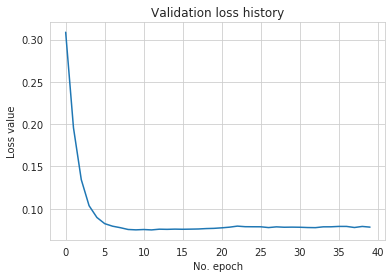

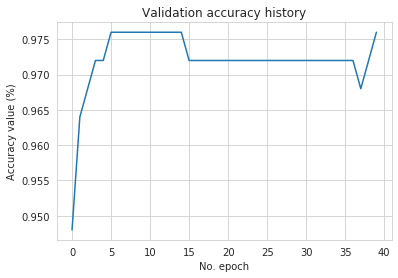

In [103]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history1.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history1.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

In [107]:
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

# np.argmax(pred,axis=1)
# Cross-validate
# Use for StratifiedKFold classification
kf = StratifiedKFold(10, shuffle=True, random_state=0) 
    
oos_y = []
oos_pred = []
fold = 0
R2=[]
# Must specify y StratifiedKFold for
for train, test in kf.split(X_train,y_train):  
    fold+=1
    print(f"Fold #{fold}")
        
    x_train = X_train[train]
    Y_train = y_train[train]
    x_test = X_train[test]
    Y_test = y_train[test]
    
    from tensorflow.keras.callbacks import EarlyStopping
    ann1 = tf.keras.models.Sequential()
    ann1.add(tf.keras.layers.Dense(units=7, activation='relu'))
    ann1.add(tf.keras.layers.Dense(units=7, activation='relu'))
    ann1.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
    ann1.compile(optimizer='adam',loss = 'binary_crossentropy',metrics = ['accuracy'])
    early_stop = EarlyStopping(monitor='accuracy', mode='max', verbose=1, patience=25)

    history = ann1.fit(x_train, Y_train, batch_size = 8, epochs = 200,validation_data=(x_test, Y_test),
          callbacks=[early_stop])
    
    pred = ann1.predict(x_test)
    pred = (pred > 0.5)
    oos_y.append(Y_test)
    # raw probabilities to chosen class (highest probability)

    oos_pred.append(pred)  

    # Measure this fold's accuracy
    from sklearn.metrics import confusion_matrix, accuracy_score

    score = accuracy_score(Y_test, pred)
    print(f"Fold score (accuracy): ",score)
    R2.append(score)

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
from sklearn.metrics import confusion_matrix, accuracy_score

score = accuracy_score(oos_y, oos_pred)
print(f"Final score (accuracy): {score}")    
    
# Write the cross-validated prediction (from the last neural network)
holdout_pred = ann1.predict(X_test)
holdout_pred = (holdout_pred > 0.5)
r2 = accuracy_score(y_test,holdout_pred)
print(f"Holdout score (Accuracy): {r2}")


Fold #1
Epoch 1/200
85/85 [==============================] - 0s 4ms/step - loss: 0.5916 - accuracy: 0.7067 - val_loss: 0.4870 - val_accuracy: 0.8667
Epoch 2/200
85/85 [==============================] - 0s 2ms/step - loss: 0.4148 - accuracy: 0.9156 - val_loss: 0.3247 - val_accuracy: 0.9467
Epoch 3/200
85/85 [==============================] - 0s 2ms/step - loss: 0.2652 - accuracy: 0.9511 - val_loss: 0.2132 - val_accuracy: 0.9600
Epoch 4/200
85/85 [==============================] - 0s 2ms/step - loss: 0.1841 - accuracy: 0.9556 - val_loss: 0.1639 - val_accuracy: 0.9600
Epoch 5/200
85/85 [==============================] - 0s 2ms/step - loss: 0.1484 - accuracy: 0.9556 - val_loss: 0.1374 - val_accuracy: 0.9600
Epoch 6/200
85/85 [==============================] - 0s 2ms/step - loss: 0.1307 - accuracy: 0.9585 - val_loss: 0.1228 - val_accuracy: 0.9600
Epoch 7/200
85/85 [==============================] - 0s 2ms/step - loss: 0.1215 - accuracy: 0.9585 - val_loss: 0.1128 - val_accuracy: 0.9600
Epoch

Epoch 59/200
85/85 [==============================] - 0s 3ms/step - loss: 0.0855 - accuracy: 0.9689 - val_loss: 0.1003 - val_accuracy: 0.9733
Epoch 60/200
85/85 [==============================] - 0s 2ms/step - loss: 0.0851 - accuracy: 0.9733 - val_loss: 0.1024 - val_accuracy: 0.9733
Epoch 61/200
85/85 [==============================] - 0s 3ms/step - loss: 0.0848 - accuracy: 0.9689 - val_loss: 0.0998 - val_accuracy: 0.9733
Epoch 62/200
85/85 [==============================] - 0s 3ms/step - loss: 0.0851 - accuracy: 0.9704 - val_loss: 0.1027 - val_accuracy: 0.9733
Epoch 63/200
85/85 [==============================] - 0s 2ms/step - loss: 0.0846 - accuracy: 0.9719 - val_loss: 0.1013 - val_accuracy: 0.9733
Epoch 64/200
85/85 [==============================] - 0s 2ms/step - loss: 0.0843 - accuracy: 0.9719 - val_loss: 0.0997 - val_accuracy: 0.9733
Epoch 65/200
85/85 [==============================] - 0s 2ms/step - loss: 0.0835 - accuracy: 0.9719 - val_loss: 0.1027 - val_accuracy: 0.9733
Epoch 

85/85 [==============================] - 0s 2ms/step - loss: 0.1028 - accuracy: 0.9674 - val_loss: 0.0835 - val_accuracy: 0.9867
Epoch 11/200
85/85 [==============================] - 0s 2ms/step - loss: 0.1008 - accuracy: 0.9689 - val_loss: 0.0825 - val_accuracy: 0.9867
Epoch 12/200
85/85 [==============================] - 0s 2ms/step - loss: 0.0994 - accuracy: 0.9659 - val_loss: 0.0817 - val_accuracy: 0.9867
Epoch 13/200
85/85 [==============================] - 0s 2ms/step - loss: 0.0980 - accuracy: 0.9659 - val_loss: 0.0811 - val_accuracy: 0.9867
Epoch 14/200
85/85 [==============================] - 0s 2ms/step - loss: 0.0979 - accuracy: 0.9644 - val_loss: 0.0804 - val_accuracy: 0.9867
Epoch 15/200
85/85 [==============================] - 0s 2ms/step - loss: 0.0967 - accuracy: 0.9644 - val_loss: 0.0802 - val_accuracy: 0.9867
Epoch 16/200
85/85 [==============================] - 0s 2ms/step - loss: 0.0966 - accuracy: 0.9659 - val_loss: 0.0802 - val_accuracy: 0.9867
Epoch 17/200
85/85 

85/85 [==============================] - 0s 2ms/step - loss: 0.1000 - accuracy: 0.9674 - val_loss: 0.0637 - val_accuracy: 0.9600
Epoch 43/200
85/85 [==============================] - 0s 2ms/step - loss: 0.0996 - accuracy: 0.9659 - val_loss: 0.0617 - val_accuracy: 0.9600
Epoch 44/200
85/85 [==============================] - 0s 2ms/step - loss: 0.0997 - accuracy: 0.9644 - val_loss: 0.0628 - val_accuracy: 0.9600
Epoch 45/200
85/85 [==============================] - 0s 2ms/step - loss: 0.0993 - accuracy: 0.9674 - val_loss: 0.0636 - val_accuracy: 0.9600
Epoch 46/200
85/85 [==============================] - 0s 2ms/step - loss: 0.0990 - accuracy: 0.9674 - val_loss: 0.0642 - val_accuracy: 0.9600
Epoch 47/200
85/85 [==============================] - 0s 2ms/step - loss: 0.0991 - accuracy: 0.9659 - val_loss: 0.0641 - val_accuracy: 0.9600
Epoch 48/200
85/85 [==============================] - 0s 2ms/step - loss: 0.0991 - accuracy: 0.9644 - val_loss: 0.0643 - val_accuracy: 0.9600
Epoch 49/200
85/85 

85/85 [==============================] - 0s 2ms/step - loss: 0.0704 - accuracy: 0.9763 - val_loss: 0.3396 - val_accuracy: 0.9067
Epoch 44/200
85/85 [==============================] - 0s 2ms/step - loss: 0.0710 - accuracy: 0.9778 - val_loss: 0.3400 - val_accuracy: 0.9067
Epoch 45/200
85/85 [==============================] - 0s 2ms/step - loss: 0.0708 - accuracy: 0.9778 - val_loss: 0.3468 - val_accuracy: 0.9067
Epoch 46/200
85/85 [==============================] - 0s 2ms/step - loss: 0.0700 - accuracy: 0.9763 - val_loss: 0.3489 - val_accuracy: 0.9067
Epoch 47/200
85/85 [==============================] - 0s 2ms/step - loss: 0.0697 - accuracy: 0.9763 - val_loss: 0.3476 - val_accuracy: 0.9067
Epoch 48/200
85/85 [==============================] - 0s 2ms/step - loss: 0.0695 - accuracy: 0.9778 - val_loss: 0.3498 - val_accuracy: 0.9067
Epoch 49/200
85/85 [==============================] - 0s 2ms/step - loss: 0.0696 - accuracy: 0.9763 - val_loss: 0.3504 - val_accuracy: 0.9067
Epoch 50/200
85/85 

Epoch 26/200
85/85 [==============================] - 0s 2ms/step - loss: 0.0949 - accuracy: 0.9704 - val_loss: 0.0954 - val_accuracy: 0.9600
Epoch 27/200
85/85 [==============================] - 0s 2ms/step - loss: 0.0942 - accuracy: 0.9719 - val_loss: 0.0957 - val_accuracy: 0.9600
Epoch 28/200
85/85 [==============================] - 0s 2ms/step - loss: 0.0941 - accuracy: 0.9719 - val_loss: 0.0957 - val_accuracy: 0.9600
Epoch 29/200
85/85 [==============================] - 0s 2ms/step - loss: 0.0938 - accuracy: 0.9719 - val_loss: 0.0952 - val_accuracy: 0.9600
Epoch 30/200
85/85 [==============================] - 0s 2ms/step - loss: 0.0933 - accuracy: 0.9719 - val_loss: 0.0954 - val_accuracy: 0.9600
Epoch 31/200
85/85 [==============================] - 0s 2ms/step - loss: 0.0930 - accuracy: 0.9719 - val_loss: 0.0955 - val_accuracy: 0.9600
Epoch 32/200
85/85 [==============================] - 0s 2ms/step - loss: 0.0932 - accuracy: 0.9719 - val_loss: 0.0961 - val_accuracy: 0.9600
Epoch 

Epoch 14/200
85/85 [==============================] - 0s 2ms/step - loss: 0.0981 - accuracy: 0.9689 - val_loss: 0.0966 - val_accuracy: 0.9600
Epoch 15/200
85/85 [==============================] - 0s 2ms/step - loss: 0.0972 - accuracy: 0.9719 - val_loss: 0.0968 - val_accuracy: 0.9600
Epoch 16/200
85/85 [==============================] - 0s 2ms/step - loss: 0.0966 - accuracy: 0.9733 - val_loss: 0.0964 - val_accuracy: 0.9600
Epoch 17/200
85/85 [==============================] - 0s 2ms/step - loss: 0.0963 - accuracy: 0.9748 - val_loss: 0.0973 - val_accuracy: 0.9600
Epoch 18/200
85/85 [==============================] - 0s 2ms/step - loss: 0.0960 - accuracy: 0.9719 - val_loss: 0.0973 - val_accuracy: 0.9600
Epoch 19/200
85/85 [==============================] - 0s 2ms/step - loss: 0.0950 - accuracy: 0.9748 - val_loss: 0.0979 - val_accuracy: 0.9733
Epoch 20/200
85/85 [==============================] - 0s 2ms/step - loss: 0.0949 - accuracy: 0.9719 - val_loss: 0.0971 - val_accuracy: 0.9733
Epoch 

Epoch 16/200
85/85 [==============================] - 0s 2ms/step - loss: 0.0986 - accuracy: 0.9748 - val_loss: 0.0987 - val_accuracy: 0.9467
Epoch 17/200
85/85 [==============================] - 0s 2ms/step - loss: 0.0978 - accuracy: 0.9733 - val_loss: 0.0969 - val_accuracy: 0.9467
Epoch 18/200
85/85 [==============================] - 0s 2ms/step - loss: 0.0974 - accuracy: 0.9719 - val_loss: 0.0956 - val_accuracy: 0.9467
Epoch 19/200
85/85 [==============================] - 0s 2ms/step - loss: 0.0971 - accuracy: 0.9733 - val_loss: 0.0937 - val_accuracy: 0.9467
Epoch 20/200
85/85 [==============================] - 0s 2ms/step - loss: 0.0967 - accuracy: 0.9733 - val_loss: 0.0933 - val_accuracy: 0.9467
Epoch 21/200
85/85 [==============================] - 0s 2ms/step - loss: 0.0965 - accuracy: 0.9719 - val_loss: 0.0933 - val_accuracy: 0.9467
Epoch 22/200
85/85 [==============================] - 0s 2ms/step - loss: 0.0960 - accuracy: 0.9719 - val_loss: 0.0933 - val_accuracy: 0.9467
Epoch 

Epoch 30/200
85/85 [==============================] - 0s 2ms/step - loss: 0.0939 - accuracy: 0.9733 - val_loss: 0.1120 - val_accuracy: 0.9467
Epoch 31/200
85/85 [==============================] - 0s 2ms/step - loss: 0.0934 - accuracy: 0.9733 - val_loss: 0.1114 - val_accuracy: 0.9467
Epoch 32/200
85/85 [==============================] - 0s 2ms/step - loss: 0.0935 - accuracy: 0.9733 - val_loss: 0.1162 - val_accuracy: 0.9467
Epoch 33/200
85/85 [==============================] - 0s 2ms/step - loss: 0.0934 - accuracy: 0.9733 - val_loss: 0.1136 - val_accuracy: 0.9467
Epoch 34/200
85/85 [==============================] - 0s 2ms/step - loss: 0.0927 - accuracy: 0.9733 - val_loss: 0.1152 - val_accuracy: 0.9467
Epoch 35/200
85/85 [==============================] - 0s 2ms/step - loss: 0.0927 - accuracy: 0.9733 - val_loss: 0.1149 - val_accuracy: 0.9467
Epoch 36/200
85/85 [==============================] - 0s 2ms/step - loss: 0.0925 - accuracy: 0.9733 - val_loss: 0.1133 - val_accuracy: 0.9467
Epoch 

In [108]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, holdout_pred)
print(cm)
accuracy_score(y_test, holdout_pred)

[[132   4]
 [  3 111]]


0.972

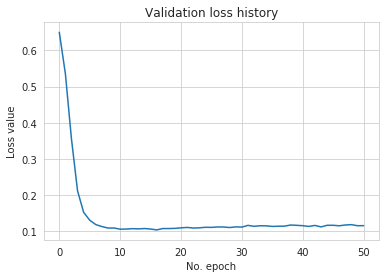

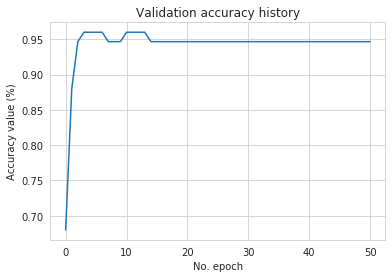

In [109]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

In [110]:
mean=sum(R2)/len(R2)

In [111]:
variance = sum([((x - mean) ** 2) for x in R2]) / len(R2) 
res = variance ** 0.5

In [115]:
mean*100

96.13333333333334

In [114]:
res*100

2.4184476196289424